In [1]:
import EOSutils as meos

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.style.use('classic')

from astropy.table import Table
from astropy import units as u
from astropy.constants import G

import mesa_helper as mh
import os
import shutil
import copy

from scipy import interpolate
from scipy.linalg import lstsq as scipy_lstsq
import scipy.integrate as integrate
import decimal 

%matplotlib inline

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_91202/1745903827.py:2: RuntimeWarning: overflow encountered in power
  meos.plot_PSE(cms19_H, 10**cms19_H.log10Pgrid,10**cms19_H.log10Sgrid,10**cms19_H.log10Ugrid)
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:705: UserWarning: The following kwargs were not used by contour: 'shading'
  cs00 = axes[0].contourf(plot_rho, plot_T, np.log10(plot_P), shading='nearest', cmap='magma', levels=np.linspace(0,30,20))
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:710: UserWarning: The following kwargs were not used by contour: 'shading'
  cs01 = axes[1].contourf(plot_rho, plot_T, np.log10(plot_S), shading='nearest', cmap='magma',levels=np.linspace(6,10,20))
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:715: UserWarning: The following kwargs were not used by contour: 'shading'
  cs02 = axes[2].contourf(plot_rho, plot_T, np.log10(plot_E

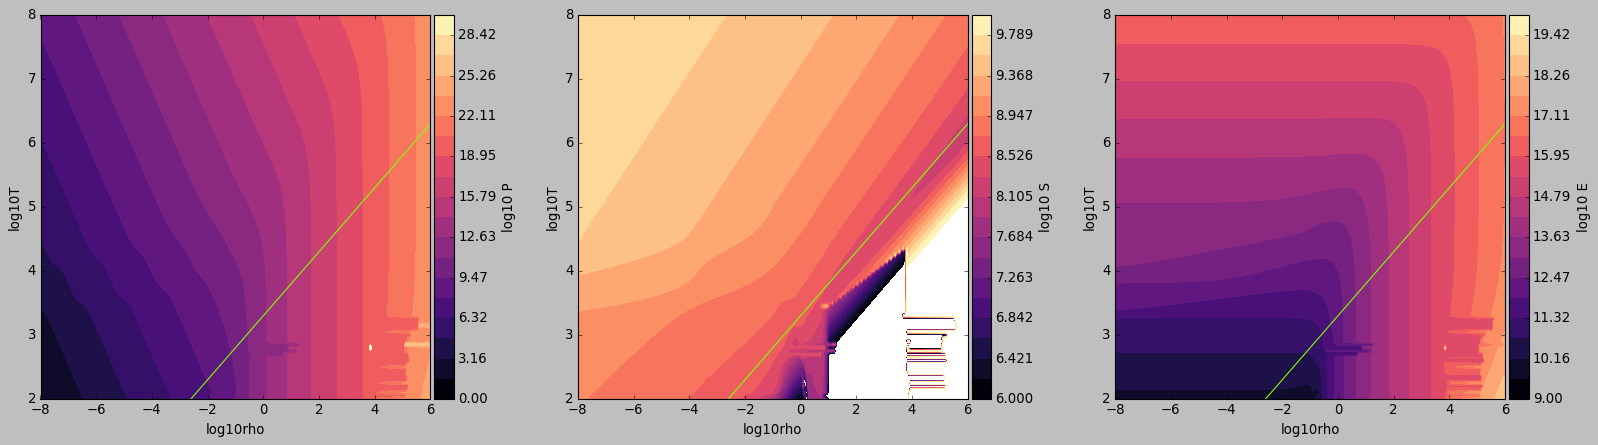

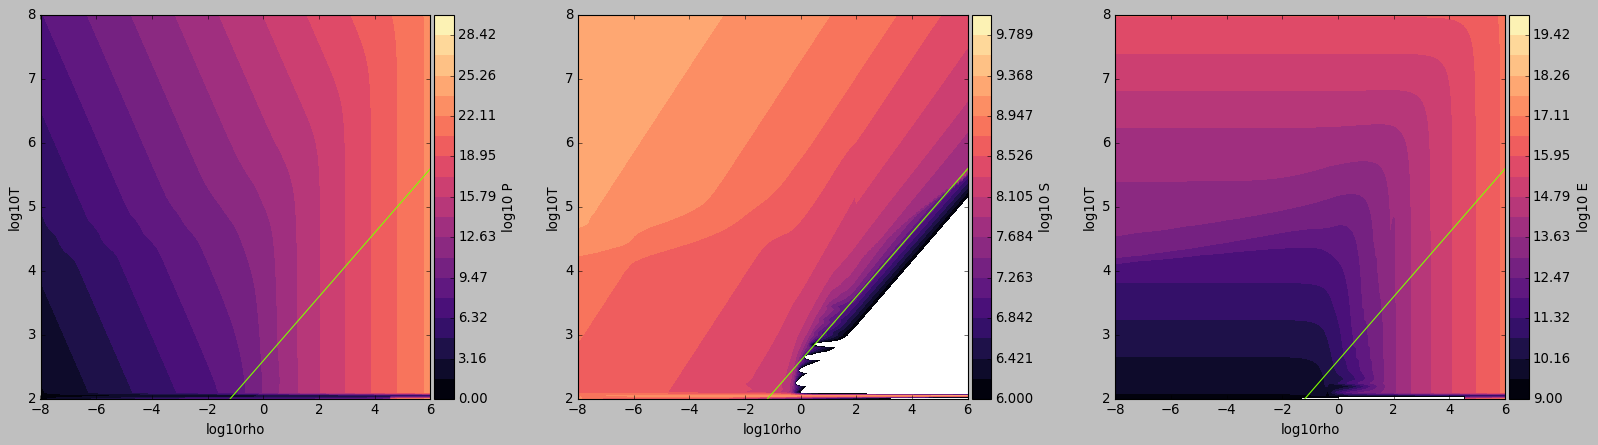

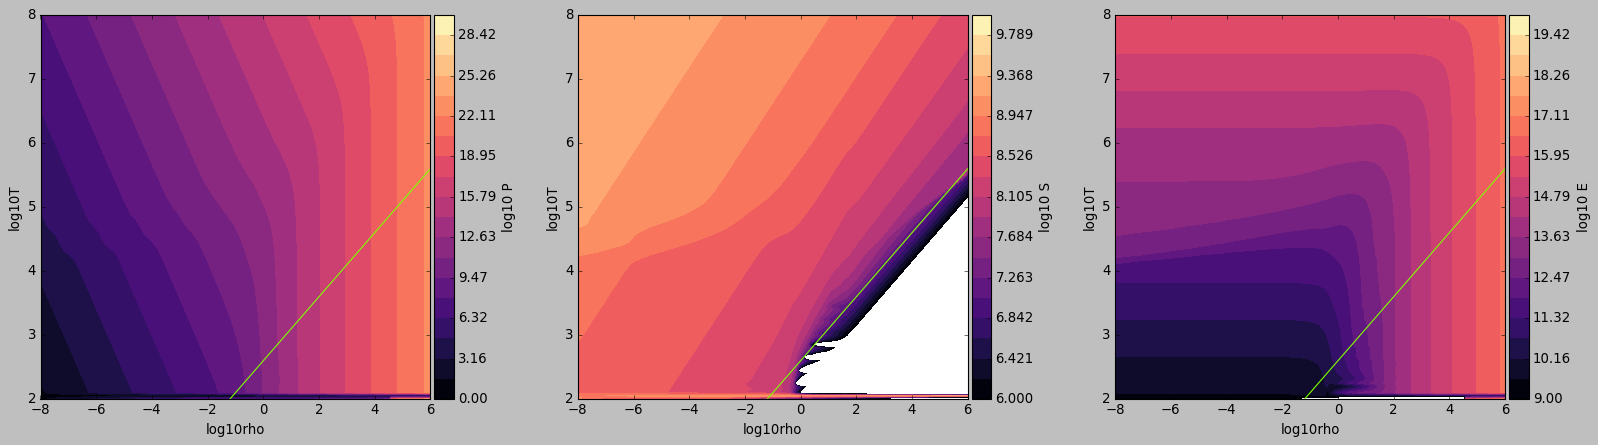

In [2]:
cms19_H = meos.CMStable("../2021_chabrier+_tables/TABLE_H_Trho_v1",units='cgs')
meos.plot_PSE(cms19_H, 10**cms19_H.log10Pgrid,10**cms19_H.log10Sgrid,10**cms19_H.log10Ugrid)

cms19_He = meos.CMStable("../2021_chabrier+_tables/TABLE_HE_Trho_v1",units='cgs')
meos.plot_PSE(cms19_He, 10**cms19_He.log10Pgrid,10**cms19_He.log10Sgrid,10**cms19_He.log10Ugrid)

new_P, new_S, new_E = meos.interpolate_problematic_values(cms19_He,bad_rho_idxs=np.arange(193,203), bad_T_idxs=[79,80,81])
meos.plot_PSE(cms19_He, 10**new_P,10**new_S,10**new_E)

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_91202/3868687441.py:1: RuntimeWarning: overflow encountered in power
  H_dP_drho_T, H_dS_drho_T, H_dE_drho_T, H_dP_dT_rho, H_dS_dT_rho, H_dE_dT_rho =  meos.finite_difference(cms19_H, 10**cms19_H.log10Pgrid,10**cms19_H.log10Sgrid,10**cms19_H.log10Ugrid,
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:926: RuntimeWarning: invalid value encountered in log10
  zs=[np.log10(dP_drho_T),np.log10(-1*dS_drho_T),np.log10(np.abs(dE_drho_T)),np.log10(dP_dT_rho),np.log10(dS_dT_rho),np.log10(dE_dT_rho)],
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:926: RuntimeWarning: divide by zero encountered in log10
  zs=[np.log10(dP_drho_T),np.log10(-1*dS_drho_T),np.log10(np.abs(dE_drho_T)),np.log10(dP_dT_rho),np.log10(dS_dT_rho),np.log10(dE_dT_rho)],
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:797: UserWarning: The following kwargs were not use

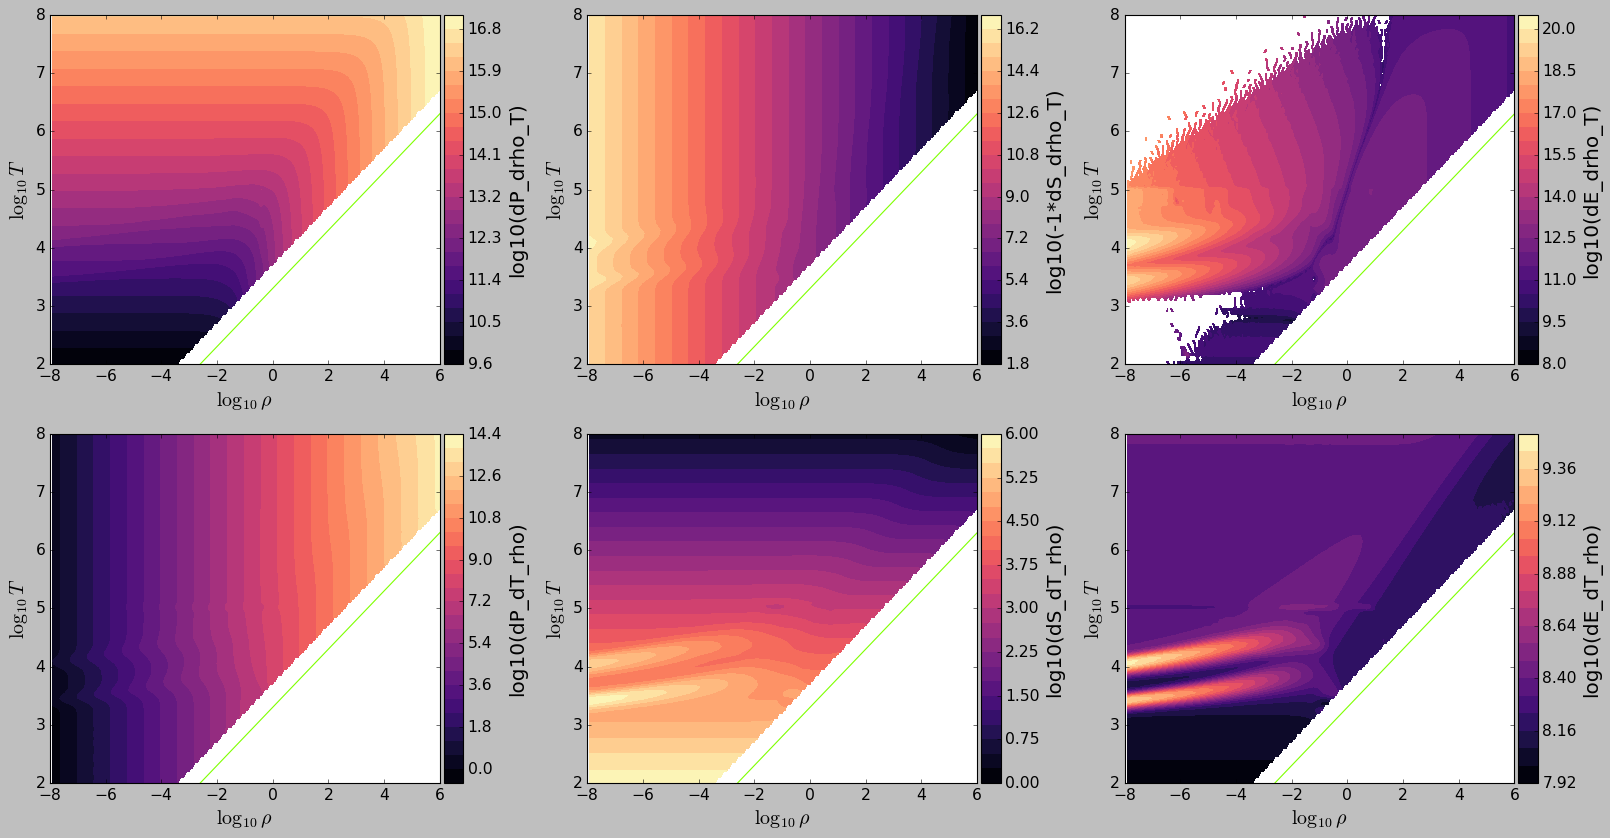

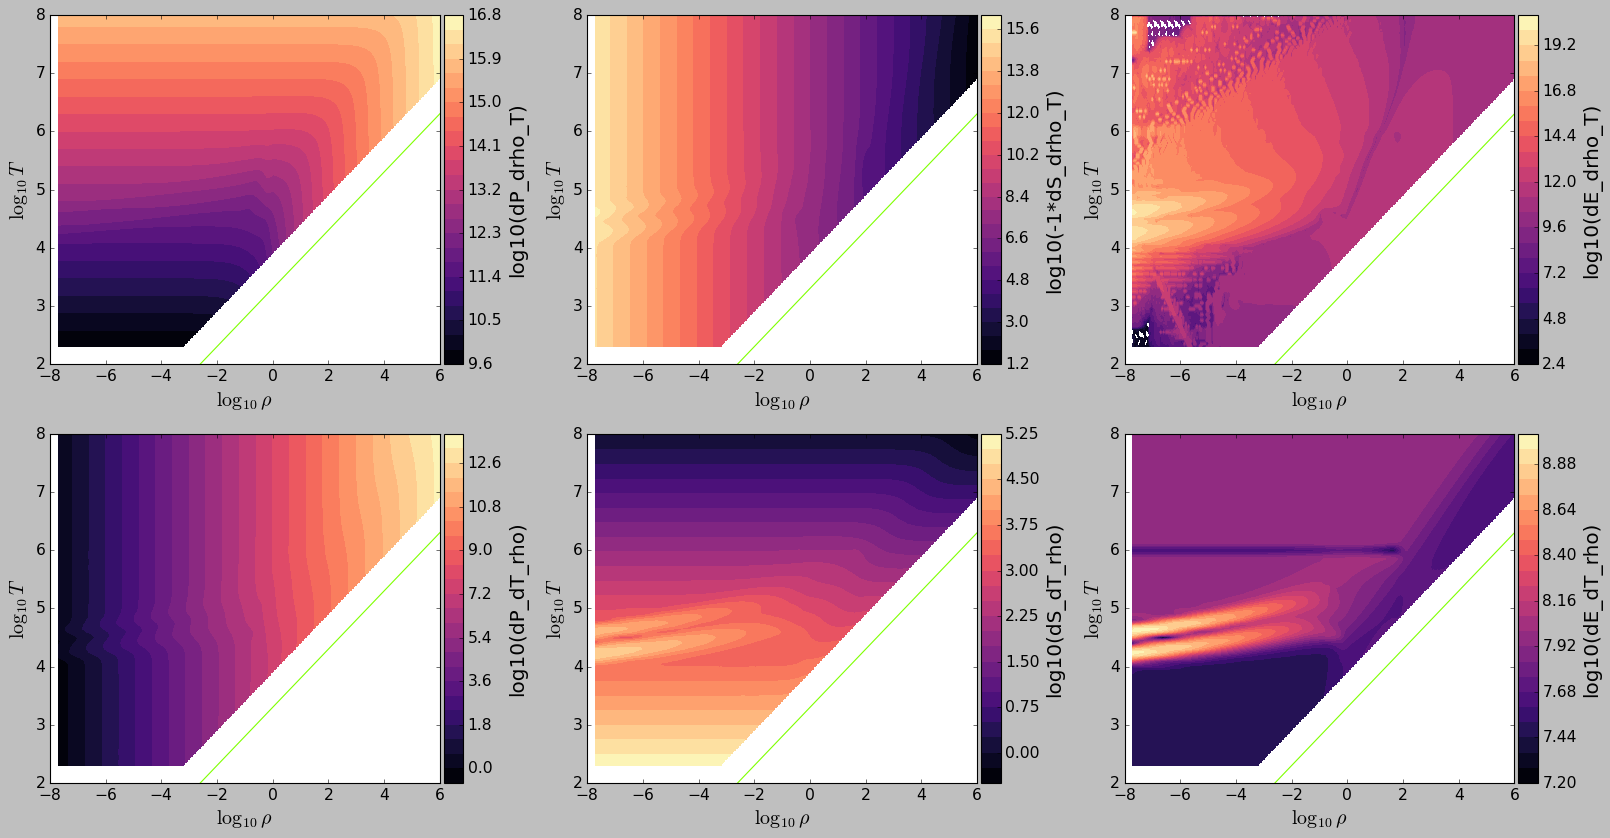

In [3]:
H_dP_drho_T, H_dS_drho_T, H_dE_drho_T, H_dP_dT_rho, H_dS_dT_rho, H_dE_dT_rho =  meos.finite_difference(cms19_H, 10**cms19_H.log10Pgrid,10**cms19_H.log10Sgrid,10**cms19_H.log10Ugrid,
                                                                                                  species='H', maskUnphysicalRegion=True, plot=True, savename=None)

He_dP_drho_T, He_dS_drho_T, He_dE_drho_T, He_dP_dT_rho, He_dS_dT_rho, He_dE_dT_rho = meos.finite_difference(cms19_H, 10**new_P,10**new_S,10**new_E,species='He', 
                                                                                                        maskUnphysicalRegion=True, plot=True, savename=None)


/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_91202/1648249241.py:1: RuntimeWarning: overflow encountered in power
  H_dpe, H_dse, H_dsp, H_a, H_b, H_c = meos.consistency_metrics(cms19_H, 10**cms19_H.log10Pgrid,10**cms19_H.log10Sgrid,10**cms19_H.log10Ugrid,H_dP_drho_T, H_dS_drho_T, H_dE_drho_T, H_dP_dT_rho, H_dS_dT_rho, H_dE_dT_rho,species='H',maskUnphysicalRegion=True,plot=True, savename=None)
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:998: RuntimeWarning: divide by zero encountered in log10
  zs=[dpe, dse, dsp, np.log10(np.abs(a)) * np.sign(a),np.log10(np.abs(b)) * np.sign(b),np.log10(np.abs(c)) * np.sign(c)],
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:800: UserWarning: The following kwargs were not used by contour: 'shading'
  cs = axes[i,j].contourf(xs[i*nCol + j], ys[i*nCol + j], zs[i*nCol + j], shading='nearest', cmap=cmap, levels=np.linspace(zlims[i*nCol+j][0],zlims[i*nCol+j][1],levels[i*n

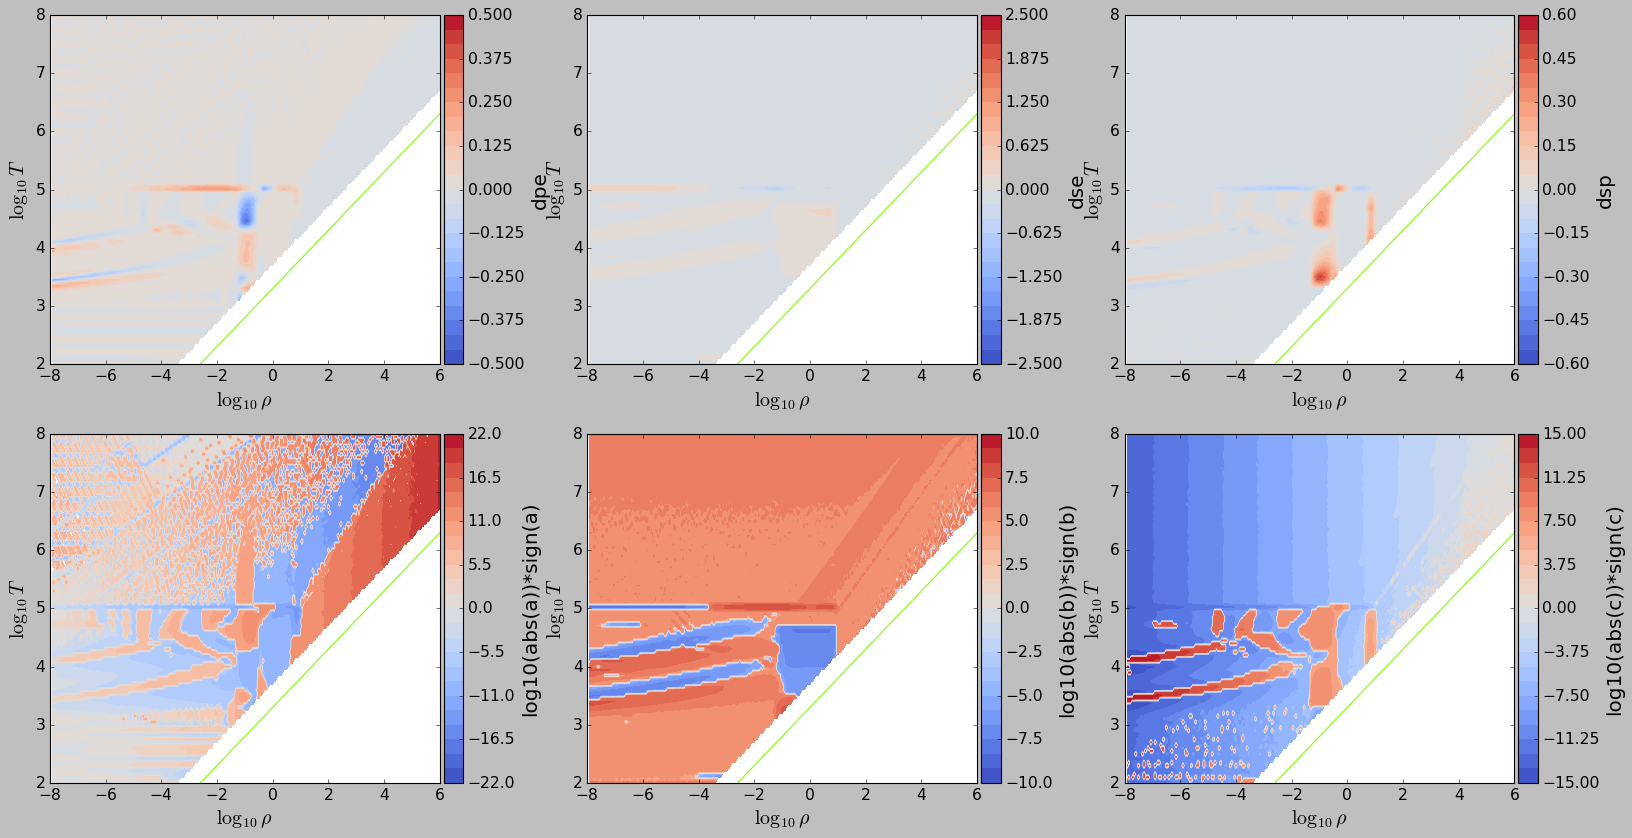

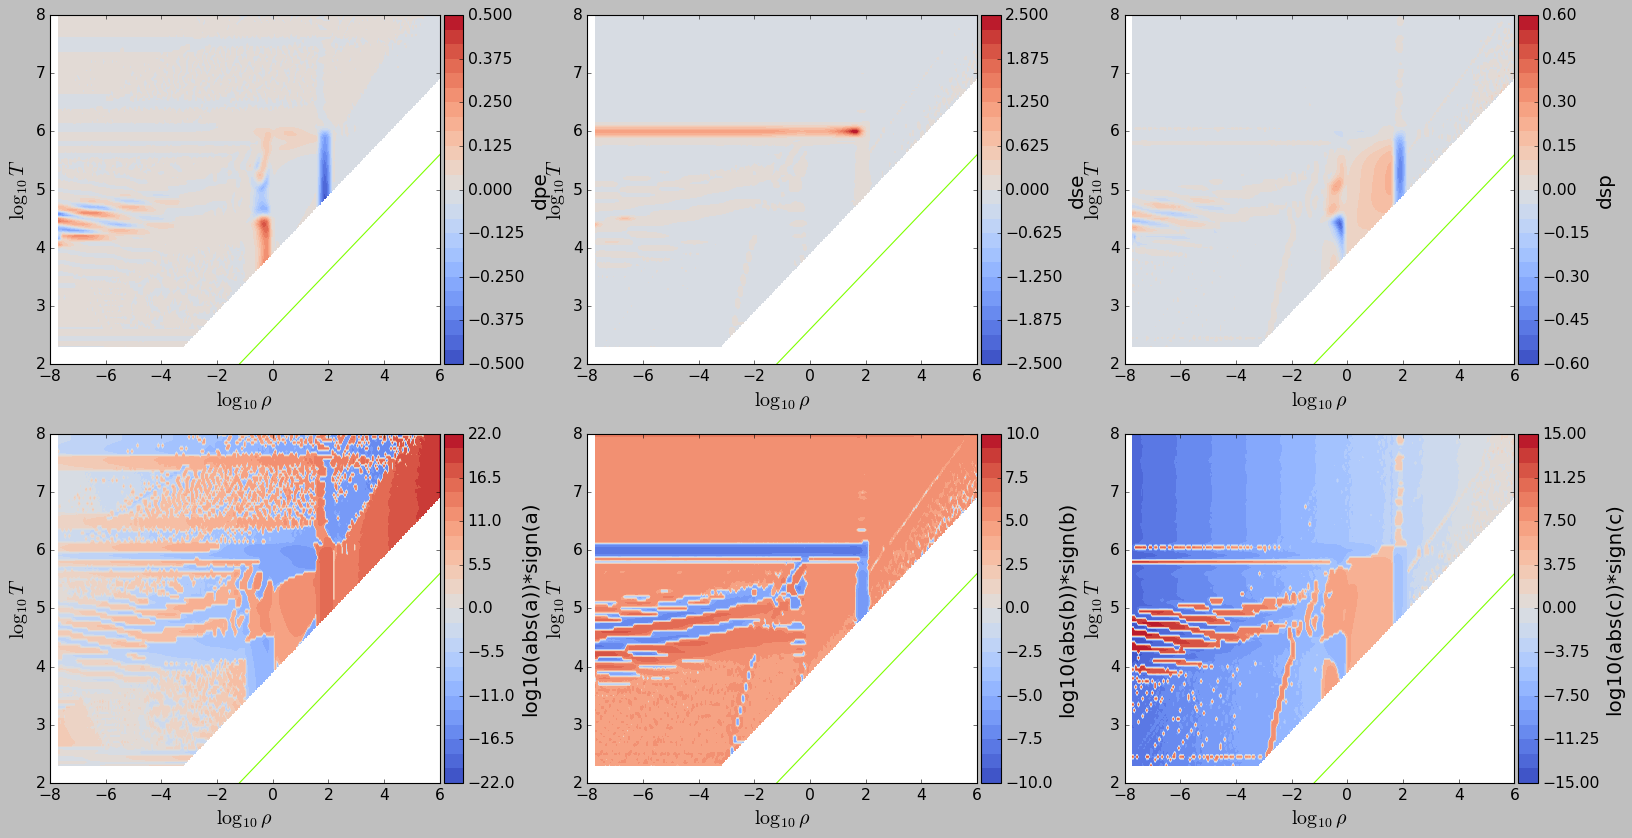

In [4]:
H_dpe, H_dse, H_dsp, H_a, H_b, H_c = meos.consistency_metrics(cms19_H, 10**cms19_H.log10Pgrid,10**cms19_H.log10Sgrid,10**cms19_H.log10Ugrid,H_dP_drho_T, H_dS_drho_T, H_dE_drho_T, H_dP_dT_rho, H_dS_dT_rho, H_dE_dT_rho,species='H',maskUnphysicalRegion=True,plot=True, savename=None)

He_dpe, He_dse, He_dsp, He_a, He_b, He_c = meos.consistency_metrics(cms19_He, 10**new_P,10**new_S,10**new_E,He_dP_drho_T, He_dS_drho_T, He_dE_drho_T, He_dP_dT_rho, He_dS_dT_rho, He_dE_dT_rho,species='He',maskUnphysicalRegion=True,plot=True, savename=None)
  

# numerical integration of system defined on lab notebook pages 156-157

In [21]:
def naive_grid_update(CMStable, P,S,E, species='H', ic='oom', plot=False, nUpdates=1):
    log10rho = CMStable.log10rhogrid
    log10T = CMStable.log10Tgrid
    
    rho = 10**CMStable.log10rhogrid
    T = 10**CMStable.log10Tgrid

    grid_rho = rho[:,0]
    grid_T = T[0]

    nrho = len(grid_rho)
    nT = len(grid_T)

    dP_drho_T, dS_drho_T, dE_drho_T, dP_dT_rho, dS_dT_rho, dE_dT_rho = meos.finite_difference(CMStable,P,S,E,species,maskUnphysicalRegion=True,plot=False,savename=None)
   
    dpe, dse, dsp, a, b, c = meos.consistency_metrics(CMStable,P,S,E,dP_drho_T, dS_drho_T, dE_drho_T, dP_dT_rho, dS_dT_rho, dE_dT_rho,species,maskUnphysicalRegion=True,plot=False,savename=None)


    if ic == 'random':
        np.random.seed(200)
        scale = 1.e-20

        pi_mat_init = np.random.normal(loc=0.,scale=scale,size=(nrho,nT))
        sigma_mat_init = np.random.normal(loc=0.,scale=scale,size=(nrho,nT))
        epsilon_mat_init = np.random.normal(loc=0.,scale=scale,size=(nrho,nT))

    elif ic == 'oom':
        epsilon_mat_init = a/rho
        sigma_mat_init = epsilon_mat_init/T + b
        pi_mat_init = T*rho*(rho*c - sigma_mat_init)
        print(np.min(epsilon_mat_init), np.max(epsilon_mat_init))
        print(np.min(sigma_mat_init), np.max(sigma_mat_init))
        print(np.min(pi_mat_init), np.max(pi_mat_init))

        


    del_logrho = 0.05
    del_logT = 0.05

    epsilon_mat = copy.deepcopy(epsilon_mat_init)
    sigma_mat = copy.deepcopy(sigma_mat_init)
    pi_mat = copy.deepcopy(pi_mat_init)
    
    for k in range(nUpdates):
         
        for i in range(1,nrho-1):
            for j in range(1,nT-1):
                epsilon_mat[i,j+1] = epsilon_mat[i,j-1] + T[i,j]*(sigma_mat[i,j+1] - sigma_mat[i,j-1]) - T[i,j]*2*del_logT*b[i,j]
                #sigma_mat[i+1,j] = sigma_mat[i-1,j] - (del_logrho/(rho[i,j]*T[i,j] * del_logT))*(pi_mat[i,j+1] - pi_mat[i,j-1]) + rho[i,j]*c[i,j]*2*del_logrho
                #pi_mat[i,j] = (pi_mat[i,j+1] - pi_mat[i,j-1])/(2*del_logT) - a[i,j] + rho[i,j]*((epsilon_mat[i+1,j] - epsilon_mat[i-1,j])/(2*del_logrho))
                
        for i in range(1,nrho-1):
            for j in range(1,nT-1):
                #epsilon_mat[i,j+1] = epsilon_mat[i,j-1] + T[i,j]*(sigma_mat[i,j+1] - sigma_mat[i,j-1]) - T[i,j]*2*del_logT*b[i,j]
                sigma_mat[i+1,j] = sigma_mat[i-1,j] - (del_logrho/(rho[i,j]*T[i,j] * del_logT))*(pi_mat[i,j+1] - pi_mat[i,j-1]) + rho[i,j]*c[i,j]*2*del_logrho
                #pi_mat[i,j] = (pi_mat[i,j+1] - pi_mat[i,j-1])/(2*del_logT) - a[i,j] + rho[i,j]*((epsilon_mat[i+1,j] - epsilon_mat[i-1,j])/(2*del_logrho))

        for i in range(1,nrho-1):
            for j in range(1,nT-1):
                # calculating the 1st term below with a central difference rather than a forward diff leads to runaway behavior
                pi_mat[i,j] = (pi_mat[i,j+1] - pi_mat[i,j])/(del_logT) - a[i,j] + rho[i,j]*((epsilon_mat[i+1,j] - epsilon_mat[i-1,j])/(2*del_logrho))
                #pi_mat[i,j] = - a[i,j] + rho[i,j]*((epsilon_mat[i+1,j] - epsilon_mat[i-1,j])/(2*del_logrho))
        

    if plot is True:
        plot_line_x = np.linspace(-8,8,100)
        plot_line_y = 3.3 + (1./2.)*plot_line_x + np.log10(CMStable.atomic_number) - (5./3)*np.log10(CMStable.mass_number)

        meos.contourf_sublots_with_colorbars(nRow=2, nCol=3, 
                                xs=[log10rho,log10rho,log10rho,log10rho,log10rho,log10rho],
                                ys=[log10T,log10T,log10T,log10T,log10T,log10T],
                                zs=[np.log10(np.abs(pi_mat_init))*np.sign(pi_mat_init), np.log10(np.abs(sigma_mat_init))*np.sign(sigma_mat_init), np.log10(np.abs(epsilon_mat_init))*np.sign(epsilon_mat_init), np.log10(pi_mat), np.log10(sigma_mat), np.log10(epsilon_mat)],
                                xlims=[(-8,6),(-8,6),(-8,6),(-8,6),(-8,6),(-8,6)], 
                                ylims=[(2,8),(2,8),(2,8),(2,8),(2,8),(2,8)], 
                                zlims=None,#[(9,17),(1,17),(8,20),(0,15),(0,6),(7,10)], 
                                levels=[25,25,25,25,25,25], 
                                xlabels=[r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$'],
                                ylabels=[r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$'],
                                zlabels=['pi_init','sigma_init','epsilon_init','pi, {0} updates'.format(nUpdates),'sigma, {0} updates'.format(nUpdates),'epsilon, {0} updates'.format(nUpdates)],
                                cmap='magma', vlines=None, hlines=None, otherlines_x=[plot_line_x], otherlines_y=[plot_line_y], savename=None)

    return pi_mat, sigma_mat, epsilon_mat

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_91202/1846634434.py:1: RuntimeWarning: overflow encountered in power
  pi_, sigma_, epsilon_ = naive_grid_update(cms19_H, 10**cms19_H.log10Pgrid,10**cms19_H.log10Sgrid,10**cms19_H.log10Ugrid, species='H', ic='oom',nUpdates=1, plot=True)


-90650628428745.67 959146872622275.8
-75158363.90724523 163592326.06675926
-1.629968925155605e+21 18743057878238.895


/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_91202/177247229.py:73: RuntimeWarning: divide by zero encountered in log10
  zs=[np.log10(np.abs(pi_mat_init))*np.sign(pi_mat_init), np.log10(np.abs(sigma_mat_init))*np.sign(sigma_mat_init), np.log10(np.abs(epsilon_mat_init))*np.sign(epsilon_mat_init), np.log10(pi_mat), np.log10(sigma_mat), np.log10(epsilon_mat)],
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_91202/177247229.py:73: RuntimeWarning: invalid value encountered in log10
  zs=[np.log10(np.abs(pi_mat_init))*np.sign(pi_mat_init), np.log10(np.abs(sigma_mat_init))*np.sign(sigma_mat_init), np.log10(np.abs(epsilon_mat_init))*np.sign(epsilon_mat_init), np.log10(pi_mat), np.log10(sigma_mat), np.log10(epsilon_mat)],


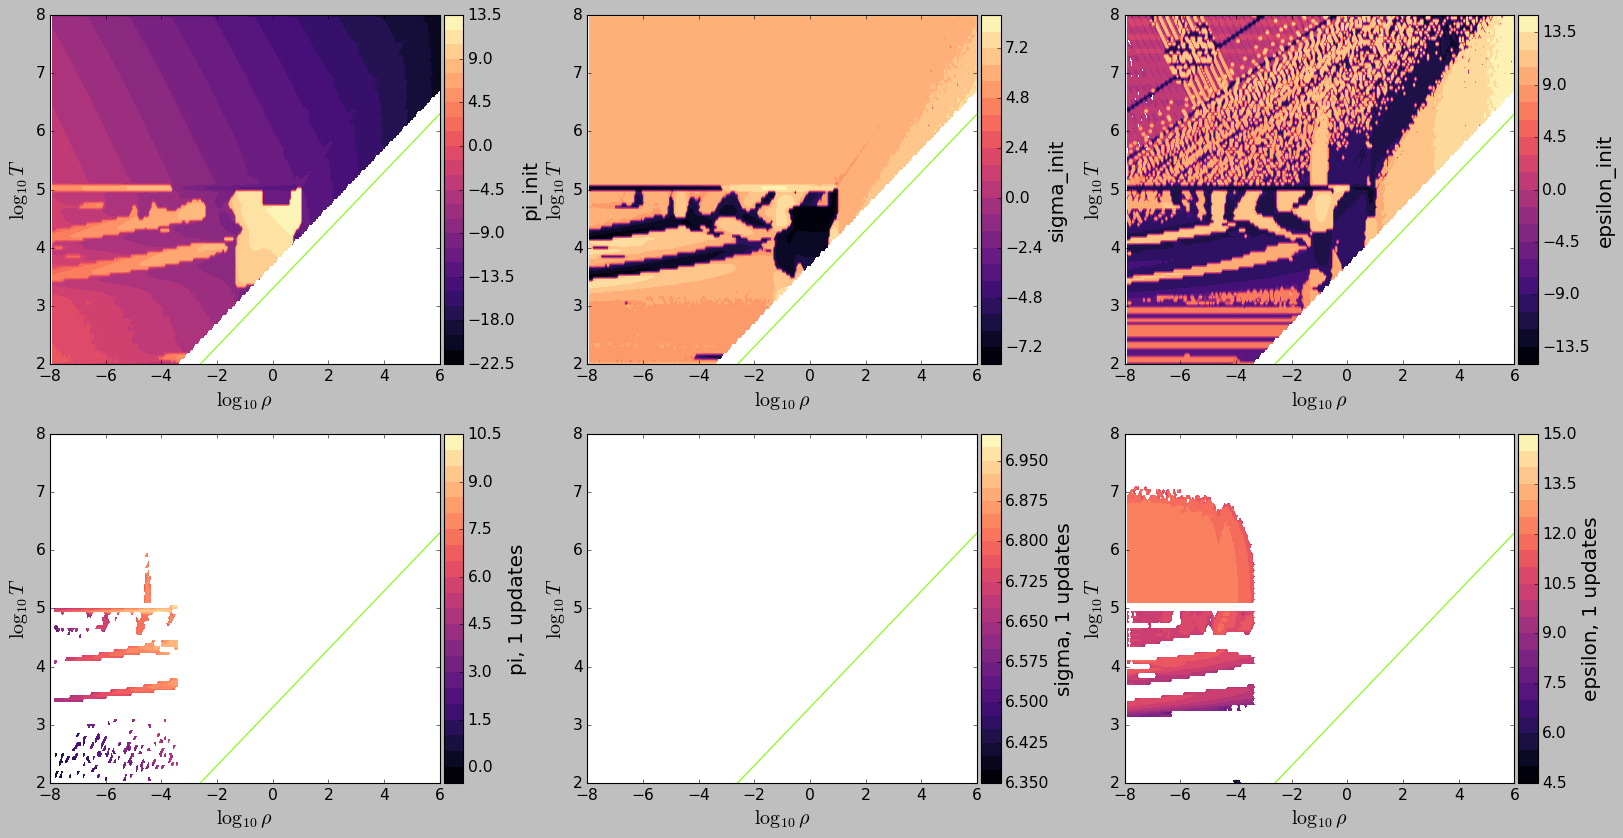

In [22]:
pi_, sigma_, epsilon_ = naive_grid_update(cms19_H, 10**cms19_H.log10Pgrid,10**cms19_H.log10Sgrid,10**cms19_H.log10Ugrid, species='H', ic='oom',nUpdates=1, plot=True)

In [142]:
pi_, sigma_, epsilon_ = naive_grid_update(cms19_H, 10**cms19_H.log10Pgrid,10**cms19_H.log10Sgrid,10**cms19_H.log10Ugrid, plot=True, logplot=True, eosname='')

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_28780/3401697256.py:1: RuntimeWarning: overflow encountered in power
  pi_, sigma_, epsilon_ = naive_grid_update(cms19_H, 10**cms19_H.log10Pgrid,10**cms19_H.log10Sgrid,10**cms19_H.log10Ugrid, plot=True, logplot=True, eosname='')
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_28780/2401649681.py:14: RuntimeWarning: divide by zero encountered in divide
  dse = T * (dS_dT_rho/dE_dT_rho) - 1
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_28780/2401649681.py:15: RuntimeWarning: divide by zero encountered in divide
  dsp = -rho**2 * (dS_drho_T/dP_dT_rho) - 1
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_28780/2878829345.py:19: RuntimeWarning: invalid value encountered in multiply
  b = -dE_dT_rho * dse
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_28780/2878829345.py:20: RuntimeWarning: invalid value encountered in multiply
  c = (1/rho**2) * dP_dT_rho * dsp


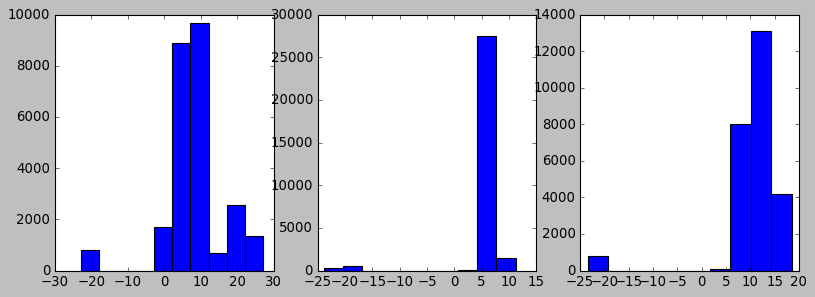

In [143]:
fig, axes = plt.subplots(1,3,figsize=(12,4))
axes[0].hist(np.log10(np.abs(np.ravel(pi_[np.isfinite(pi_)]))))
axes[1].hist(np.log10(np.abs(np.ravel(sigma_[np.isfinite(sigma_)]))))
axes[2].hist(np.log10(np.abs(np.ravel(epsilon_[np.isfinite(epsilon_)]))))
plt.show()

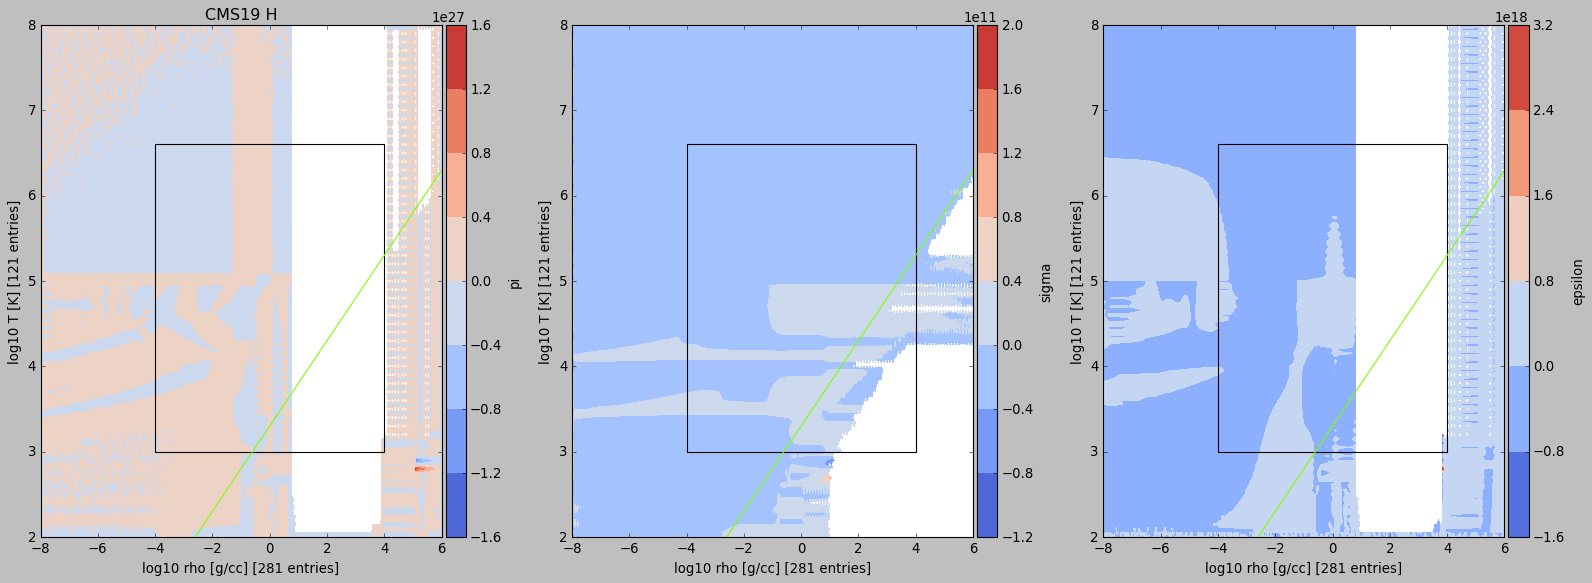

In [144]:
fig, axes = plt.subplots(1,3,figsize=(24,8))
    
divider0 = make_axes_locatable(axes[0])
cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cs0 = axes[0].contourf(plot_rho, plot_T, pi_, cmap='coolwarm',alpha=1,)
fig.colorbar(cs0, cax=cax0, orientation='vertical',label='pi')
    
divider1 = make_axes_locatable(axes[1])
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cs1 = axes[1].contourf(plot_rho, plot_T, sigma_,cmap='coolwarm',alpha=1,)
fig.colorbar(cs1, cax=cax1, orientation='vertical',label='sigma')

divider2 = make_axes_locatable(axes[2])
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
cs2 = axes[2].contourf(plot_rho, plot_T, epsilon_, cmap='coolwarm',alpha=1,)
fig.colorbar(cs2, cax=cax2, orientation='vertical',label='epsilon')    

log10rho_ = np.linspace(-8,6,100)
for ax in axes:
    p = plt.Rectangle((-4,3),8,3.6,fill=False,color='k')
    ax.add_patch(p)
    ax.set_xlim(-8,6)
    ax.set_ylim(2,8)
    # chabrier+2019 eq 3, limit of validity of EoS
    ax.plot(log10rho_, 3.3 + (1./2.)*log10rho_ + np.log10(table.atomic_number) - (5./3)*np.log10(table.mass_number), ls='-', color='#7FFF00')
    ax.set_xlim(-8.,6)
    ax.set_ylim(2.,8.)
    ax.set_ylabel('log10 T [K] [{0} entries]'.format(nT))
    ax.set_xlabel('log10 rho [g/cc] [{0} entries]'.format(nrho))
        
axes[0].set_title("CMS19 H")
plt.subplots_adjust(hspace=0.1,wspace=0.25)
plt.show()

In [145]:
pi_[~np.isfinite(pi_)] = np.median(pi_[np.isfinite(pi_)])
sigma_[~np.isfinite(sigma_)] = np.median(sigma_[np.isfinite(sigma_)])
epsilon_[~np.isfinite(epsilon_)] = np.median(epsilon_[np.isfinite(epsilon_)])

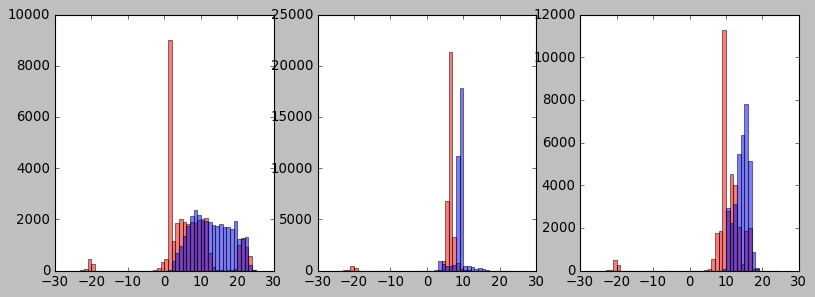

In [146]:
fig, axes = plt.subplots(1,3,figsize=(12,4))
axes[0].hist(np.log10(np.abs(np.ravel(pi_))),color='r',range=(-25,25),bins=50,alpha=0.5)
axes[0].hist(np.ravel(cms19_H.log10Pgrid),color='b',range=(-25,25),bins=50,alpha=0.5)
axes[1].hist(np.log10(np.abs(np.ravel(sigma_))),color='r',range=(-25,25),bins=50,alpha=0.5)
axes[1].hist(np.ravel(cms19_H.log10Sgrid),color='b',range=(-25,25),bins=50,alpha=0.5)
axes[2].hist(np.log10(np.abs(np.ravel(epsilon_))),color='r',range=(-25,25),bins=50,alpha=0.5)
axes[2].hist(np.ravel(cms19_H.log10Ugrid),color='b',range=(-25,25),bins=50,alpha=0.5)
plt.show()

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_28780/1010418805.py:1: RuntimeWarning: overflow encountered in power
  dpe,dse,dsp = consistency_metrics(cms19_H, 10**cms19_H.log10Pgrid + pi_, 10**cms19_H.log10Sgrid + sigma_,10**cms19_H.log10Ugrid + epsilon_, plot=True, logplot=True,eosname='')
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_28780/2401649681.py:14: RuntimeWarning: divide by zero encountered in divide
  dse = T * (dS_dT_rho/dE_dT_rho) - 1
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_28780/2401649681.py:15: RuntimeWarning: divide by zero encountered in divide
  dsp = -rho**2 * (dS_drho_T/dP_dT_rho) - 1
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_28780/2401649681.py:38: RuntimeWarning: divide by zero encountered in log10
  cs0 = axes[0].pcolormesh(meshgrid_rho, meshgrid_T, np.log10(np.abs(plot_dpe)), shading='nearest', cmap=cmap, vmin=-16,vmax=0)


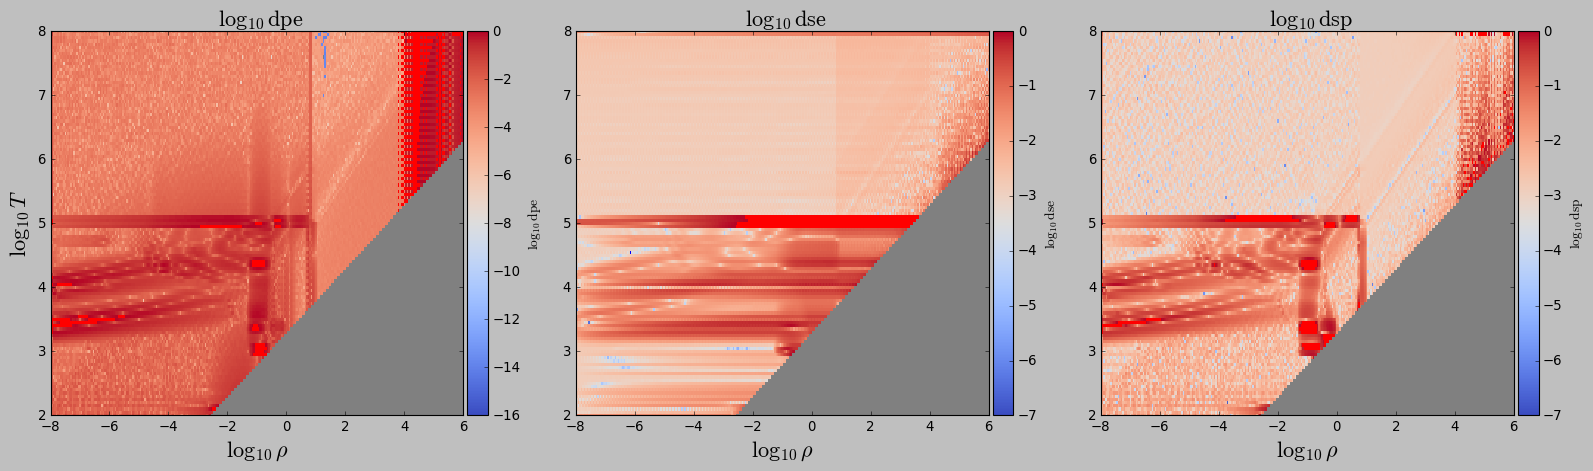

In [147]:
dpe,dse,dsp = consistency_metrics(cms19_H, 10**cms19_H.log10Pgrid + pi_, 10**cms19_H.log10Sgrid + sigma_,10**cms19_H.log10Ugrid + epsilon_, plot=True, logplot=True,eosname='')

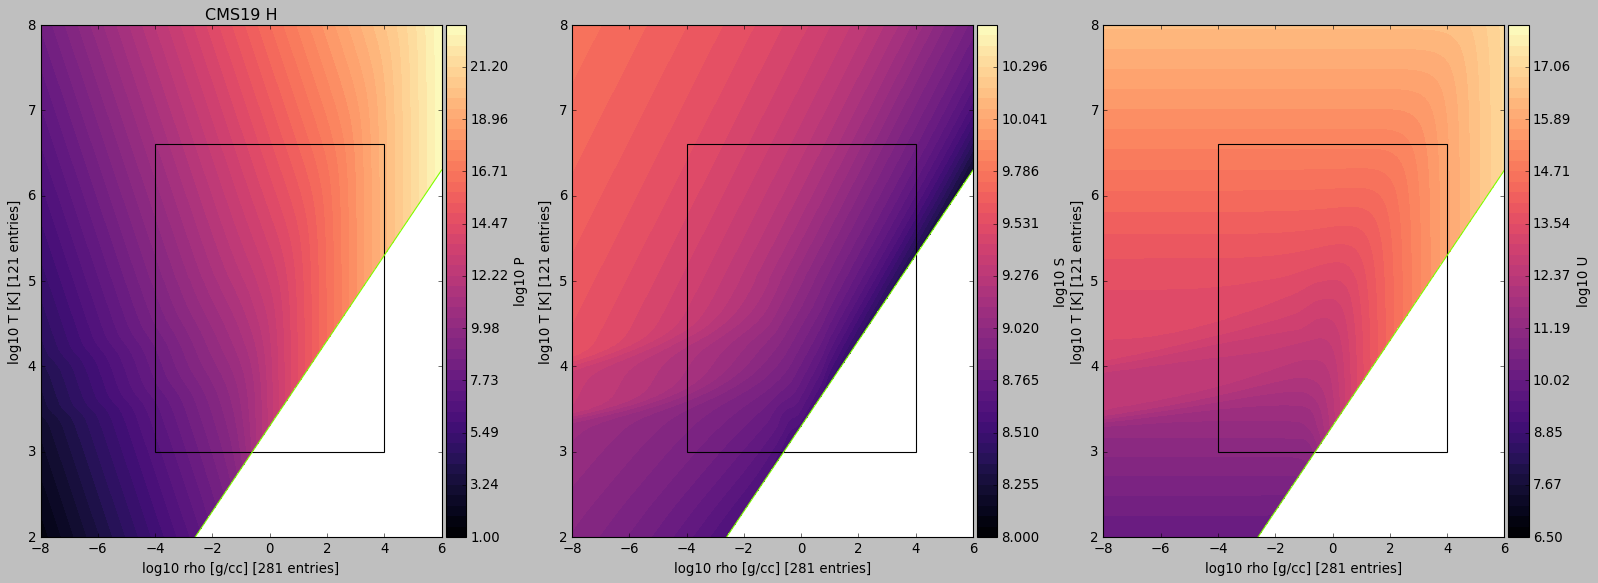

In [148]:
table = cms19_H

Slevels = np.linspace(8,10.5, 50)
Svmin = 8
Svmax = 10.5

Plevels = np.linspace(1,23., 50)
Pvmin = 1
Pvmax = 23.0

Ulevels = np.linspace(6.5,18, 50)
Uvmin = 6.5
Uvmax = 18


nT = len(table.independent_arr_1)
nrho = len(table.independent_arr_2)
 
# masked arrays work a bit backwards--if mask == True, then that value is masked, i.e. set to np.nan
allowedMask = ~meos.boundary_mask_rhoT(table) & ~meos.boundary_mask_PT(table)
    
plot_rho = np.ma.array(table.log10rhogrid, mask=~allowedMask, fill_value = np.nan)
plot_T = np.ma.array(table.log10Tgrid, mask=~allowedMask, fill_value = np.nan)
plot_S = np.ma.array(table.log10Sgrid, mask=~allowedMask, fill_value = np.nan)
plot_P = np.ma.array(table.log10Pgrid, mask=~allowedMask, fill_value = np.nan)
plot_U = np.ma.array(table.log10Ugrid, mask=~allowedMask, fill_value = np.nan)
    
fig, axes = plt.subplots(1,3,figsize=(24,8))
    
divider0 = make_axes_locatable(axes[0])
cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cs0 = axes[0].contourf(plot_rho, plot_T, plot_P, levels=Plevels, cmap='magma',alpha=1,vmin=Pvmin, vmax=Pvmax)
fig.colorbar(cs0, cax=cax0, orientation='vertical',label='log10 P')
    
divider1 = make_axes_locatable(axes[1])
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cs1 = axes[1].contourf(plot_rho, plot_T, plot_S, levels=Slevels, cmap='magma',alpha=1, vmin=Svmin, vmax=Svmax)
fig.colorbar(cs1, cax=cax1, orientation='vertical',label='log10 S')

divider2 = make_axes_locatable(axes[2])
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
cs2 = axes[2].contourf(plot_rho, plot_T, plot_U, levels=Ulevels, cmap='magma',alpha=1, vmin=Uvmin, vmax=Uvmax)
fig.colorbar(cs2, cax=cax2, orientation='vertical',label='log10 U')    

'''
divider3 = make_axes_locatable(axes[3])
cax3 = divider3.append_axes('right', size='5%', pad=0.05)
cs3 = axes[3].contourf(plot_rho, plot_T, np.log10(10**plot_P/10**plot_rho), cmap='magma',alpha=1,levels=np.linspace(9,18,50))
fig.colorbar(cs3, cax=cax3, orientation='vertical',label='log10 (P/rho)')    
    

divider4 = make_axes_locatable(axes[4])
cax4 = divider4.append_axes('right', size='5%', pad=0.05)
cs4 = axes[4].contourf(plot_rho, plot_T, np.log10(10**plot_S * 10**plot_T), cmap='magma',alpha=1,levels=np.linspace(9,18,50))
fig.colorbar(cs4, cax=cax4, orientation='vertical',label='log10 (T*S)')    
'''

log10rho_ = np.linspace(-8,6,100)
for ax in axes:
    p = plt.Rectangle((-4,3),8,3.6,fill=False,color='k')
    ax.add_patch(p)
    ax.set_xlim(-8,6)
    ax.set_ylim(2,8)
    # chabrier+2019 eq 3, limit of validity of EoS
    ax.plot(log10rho_, 3.3 + (1./2.)*log10rho_ + np.log10(table.atomic_number) - (5./3)*np.log10(table.mass_number), ls='-', color='#7FFF00')
    ax.set_xlim(-8.,6)
    ax.set_ylim(2.,8.)
    ax.set_ylabel('log10 T [K] [{0} entries]'.format(nT))
    ax.set_xlabel('log10 rho [g/cc] [{0} entries]'.format(nrho))
        
axes[0].set_title("CMS19 H")
plt.subplots_adjust(hspace=0.1,wspace=0.25)
plt.show()
#plt.savefig("CMS19_H.pdf",bbox_inches='tight')


In [78]:
def calculate_deltaP(CMStable):
    """
    deltaP = rho**2 * (dE_drho_T - T*dS_drho_T) - P
    """
    grid_rho = 10**CMStable.log10rhogrid[:,0]
    grid_T = 10**CMStable.log10Tgrid[0]
    
    between_rho = 0.5*(grid_rho[0:-1] + grid_rho[1:])
    between_T = 0.5*(grid_T[0:-1] + grid_T[1:])

    nrho, nT = np.shape(CMStable.log10Tgrid)

    dS_drho_T_btwn_rho_grid_points = np.zeros((nrho-1, nT))
    dE_drho_T_btwn_rho_grid_points = np.zeros((nrho-1, nT))

    S = 10**CMStable.log10Sgrid
    E = 10**CMStable.log10Ugrid
    rho = 10**CMStable.log10rhogrid
    P = 10**CMStable.log10Pgrid
    T = 10**CMStable.log10Tgrid

    # get rid of single inf value
    S[~np.isfinite(S)] = np.max(S[np.isfinite(S)])
    E[~np.isfinite(E)] = np.max(E[np.isfinite(E)])

    for i in range(nrho - 1): # number of unique rho values = 281
        dS_drho_T_btwn_rho_grid_points[i] = (S[i+1] - S[i])/(rho[i+1] - rho[i])
        dE_drho_T_btwn_rho_grid_points[i] = (E[i+1] - E[i])/(rho[i+1] - rho[i])

    # bounds_error = False, fill_value = None should allow the entries on the edges of the grid to be extrapolated.
    interp_dS_drho_T_given_log10rho_log10T_cubic = interpolate.RegularGridInterpolator(points=(between_rho, grid_T), values=dS_drho_T_btwn_rho_grid_points, bounds_error=False, fill_value=None, method='slinear')
    interp_dE_drho_T_given_log10rho_log10T_cubic = interpolate.RegularGridInterpolator(points=(between_rho, grid_T), values=dE_drho_T_btwn_rho_grid_points, bounds_error=False, fill_value=None, method='slinear')

    dS_drho_T = interp_dS_drho_T_given_log10rho_log10T_cubic((10**CMStable.log10rhogrid, 10**CMStable.log10Tgrid))
    dE_drho_T = interp_dE_drho_T_given_log10rho_log10T_cubic((10**CMStable.log10rhogrid, 10**CMStable.log10Tgrid))
    
    deltaP = rho**2 * ( dE_drho_T - ( T * dS_drho_T )) - P
    
    return deltaP

In [79]:
def calculate_deltaS(CMStable):
    """
    deltaS = - dE_dT_rho + T * dS_dT_rho
    """

    grid_rho = 10**CMStable.log10rhogrid[:,0]
    grid_T = 10**CMStable.log10Tgrid[0]
    
    between_rho = 0.5*(grid_rho[0:-1] + grid_rho[1:])
    between_T = 0.5*(grid_T[0:-1] + grid_T[1:])

    nrho, nT = np.shape(CMStable.log10Tgrid)

    dS_dT_rho_btwn_T_grid_points = np.zeros((nrho, nT-1))
    dE_dT_rho_btwn_T_grid_points = np.zeros((nrho, nT-1))

    S = 10**CMStable.log10Sgrid
    E = 10**CMStable.log10Ugrid
    rho = 10**CMStable.log10rhogrid
    P = 10**CMStable.log10Pgrid
    T = 10**CMStable.log10Tgrid

    # get rid of single inf value
    S[~np.isfinite(S)] = np.max(S[np.isfinite(S)])
    E[~np.isfinite(E)] = np.max(E[np.isfinite(E)])

    for j in range(nT - 1): # number of unique T values = 121
        dS_dT_rho_btwn_T_grid_points[:,j] = (S[:,j+1] - S[:,j])/(T[:,j+1] - T[:,j])
        dE_dT_rho_btwn_T_grid_points[:,j] = (E[:,j+1] - E[:,j])/(T[:,j+1] - T[:,j])

    # bounds_error = False, fill_value = None should allow the entries on the edges of the grid to be extrapolated.
    interp_dS_dT_rho_given_log10rho_log10T_cubic = interpolate.RegularGridInterpolator(points=(grid_rho, between_T), values=dS_dT_rho_btwn_T_grid_points, bounds_error=False, fill_value=None, method='slinear')
    interp_dE_dT_rho_given_log10rho_log10T_cubic = interpolate.RegularGridInterpolator(points=(grid_rho, between_T), values=dE_dT_rho_btwn_T_grid_points, bounds_error=False, fill_value=None, method='slinear')

    dS_dT_rho = interp_dS_dT_rho_given_log10rho_log10T_cubic((10**CMStable.log10rhogrid, 10**CMStable.log10Tgrid))
    dE_dT_rho = interp_dE_dT_rho_given_log10rho_log10T_cubic((10**CMStable.log10rhogrid, 10**CMStable.log10Tgrid))

    deltaS = -dE_dT_rho + ( T * dS_dT_rho)
    
    return deltaS

In [80]:
deltaP = calculate_deltaP(cms19_H)
deltaS = calculate_deltaS(cms19_H)

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_70431/234256562.py:16: RuntimeWarning: overflow encountered in power
  S = 10**CMStable.log10Sgrid
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_70431/234256562.py:17: RuntimeWarning: overflow encountered in power
  E = 10**CMStable.log10Ugrid
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_70431/613727270.py:18: RuntimeWarning: overflow encountered in power
  E = 10**CMStable.log10Ugrid


# ~approach 1:~ assume deltaE = 0 : works OK for dpe and dsp, but dse still bad
# ~approach 2:~ assume deltaE propto T * deltaS : haven't figured out a good way to determine const. of proportionality
# approach 3: use dse constraint (see lab notebook pgs 151, 154)
# ~approach 4: iterative using dse constraint~

In [81]:
def solve_deltaE(CMStable, deltaS):
    grid_rho = 10**CMStable.log10rhogrid[:,0]
    grid_T = 10**CMStable.log10Tgrid[0]
    
    between_rho = 0.5*(grid_rho[0:-1] + grid_rho[1:])
    between_T = 0.5*(grid_T[0:-1] + grid_T[1:])

    nrho, nT = np.shape(CMStable.log10Tgrid)

    S = 10**CMStable.log10Sgrid
    E = 10**CMStable.log10Ugrid
    rho = 10**CMStable.log10rhogrid
    P = 10**CMStable.log10Pgrid
    T = 10**CMStable.log10Tgrid

    # get rid of single inf value
    S[~np.isfinite(S)] = np.max(S[np.isfinite(S)])
    E[~np.isfinite(E)] = np.max(E[np.isfinite(E)])  

    S_adj = S + deltaS
    interp_S_adj = interpolate.RegularGridInterpolator(points=(grid_rho, grid_T), values=S_adj, bounds_error=False, fill_value=None, method='slinear')
    rr,btt = np.meshgrid(grid_rho,between_T)
    rr=rr.T
    btt = btt.T
    
    S_adj_btwn_grid_points = interp_S_adj((rr,btt))
    
    RHS = T * (S + deltaS)

    dE_dT_rho_btwn_T_grid_points = np.zeros((nrho, nT-1))
    dRHS_dT_rho_btwn_T_grid_points = np.zeros((nrho, nT-1))

    for j in range(nT - 1): # number of unique T values = 121
        dE_dT_rho_btwn_T_grid_points[:,j] = (E[:,j+1] - E[:,j])/(T[:,j+1] - T[:,j])
        dRHS_dT_rho_btwn_T_grid_points[:,j] = (RHS[:,j+1] - RHS[:,j])/(T[:,j+1] - T[:,j])
    '''
    # bounds_error = False, fill_value = None should allow the entries on the edges of the grid to be extrapolated.
    interp_dE_dT_rho_given_log10rho_log10T_cubic = interpolate.RegularGridInterpolator(points=(grid_rho, between_T), values=dE_dT_rho_btwn_T_grid_points, bounds_error=False, fill_value=None, method='slinear')
    interp_dRHS_dT_rho_given_log10rho_log10T_cubic = interpolate.RegularGridInterpolator(points=(grid_rho, between_T), values=dRHS_dT_rho_btwn_T_grid_points, bounds_error=False, fill_value=None, method='slinear')
    
    dE_dT_rho = interp_dE_dT_rho_given_log10rho_log10T_cubic((10**CMStable.log10rhogrid, 10**CMStable.log10Tgrid))
    dRHS_dT_rho = interp_dRHS_dT_rho_given_log10rho_log10T_cubic((10**CMStable.log10rhogrid, 10**CMStable.log10Tgrid))
    '''
    
    dEpsilon_dT_rho_btwn_grid_points = dRHS_dT_rho_btwn_T_grid_points - S_adj_btwn_grid_points - dE_dT_rho_btwn_T_grid_points

    epsilon_except_T_1st_col = np.zeros((nrho, nT-2))

    for i in range(nrho):
        epsilon_except_T_1st_col[i] = integrate.cumulative_trapezoid(dEpsilon_dT_rho_btwn_grid_points[i], between_T)

    interp_epsilon_given_log10rho_log10T_cubic = interpolate.RegularGridInterpolator(points=(grid_rho, between_T[1:]), values=epsilon_except_T_1st_col, bounds_error=False, fill_value=None, method='slinear')
    
    epsilon = interp_epsilon_given_log10rho_log10T_cubic((10**CMStable.log10rhogrid, 10**CMStable.log10Tgrid))

    for i in range(nrho):
        epsilon[i] = epsilon[i] - np.median(epsilon[i])
        
    '''
    fig, axes = plt.subplots(1,4,figsize=(32,8))
    
    divider0 = make_axes_locatable(axes[0])
    cax0 = divider0.append_axes('right', size='5%', pad=0.05)
    cs0 = axes[0].contourf(plot_rho, plot_T, np.log10(np.abs(dE_dT_rho)), cmap='magma', alpha=1, levels=50, )
    fig.colorbar(cs0, cax=cax0, orientation='vertical',label='dE_dT_rho')
        
    divider1 = make_axes_locatable(axes[1])
    cax1 = divider1.append_axes('right', size='5%', pad=0.05)
    cs1 = axes[1].contourf(plot_rho, plot_T, np.log10(np.abs(dEpsilon_dT_rho)), cmap='magma', alpha=1, levels=50, )
    fig.colorbar(cs1, cax=cax1, orientation='vertical',label='dEpsilon_dT_rho')

    divider2 = make_axes_locatable(axes[2])
    cax2 = divider2.append_axes('right', size='5%', pad=0.05)
    cs2 = axes[2].contourf(plot_rho, plot_T, np.log10(np.abs(E)), cmap='magma', alpha=1, levels=50, )
    fig.colorbar(cs2, cax=cax2, orientation='vertical',label='E')
        
    divider3 = make_axes_locatable(axes[3])
    cax3 = divider3.append_axes('right', size='5%', pad=0.05)
    cs3 = axes[3].contourf(plot_rho, plot_T, np.log10(np.abs(epsilon)), cmap='magma', alpha=1, levels=50, )
    fig.colorbar(cs3, cax=cax3, orientation='vertical',label='epsilon')

    log10rho_ = np.linspace(-8,6,100)
    for ax in axes:
        p = plt.Rectangle((-4,3),8,3.6,fill=False,color='k')
        ax.add_patch(p)
        ax.set_xlim(-8,6)
        ax.set_ylim(2,8)
        # chabrier+2019 eq 3, limit of validity of EoS
        ax.plot(log10rho_, 3.3 + (1./2.)*log10rho_ + np.log10(table.atomic_number) - (5./3)*np.log10(table.mass_number), ls='-', color='#7FFF00')
        ax.set_xlim(-8.,6)
        ax.set_ylim(2.,8.)
        ax.set_ylabel('log10 T [K] [{0} entries]'.format(nT))
        ax.set_xlabel('log10 rho [g/cc] [{0} entries]'.format(nrho))
    plt.show()
    '''
    return epsilon

In [82]:
deltaE = solve_deltaE(cms19_H, deltaS)
#print(deltaE)

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_70431/489167231.py:10: RuntimeWarning: overflow encountered in power
  S = 10**CMStable.log10Sgrid
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_70431/489167231.py:11: RuntimeWarning: overflow encountered in power
  E = 10**CMStable.log10Ugrid


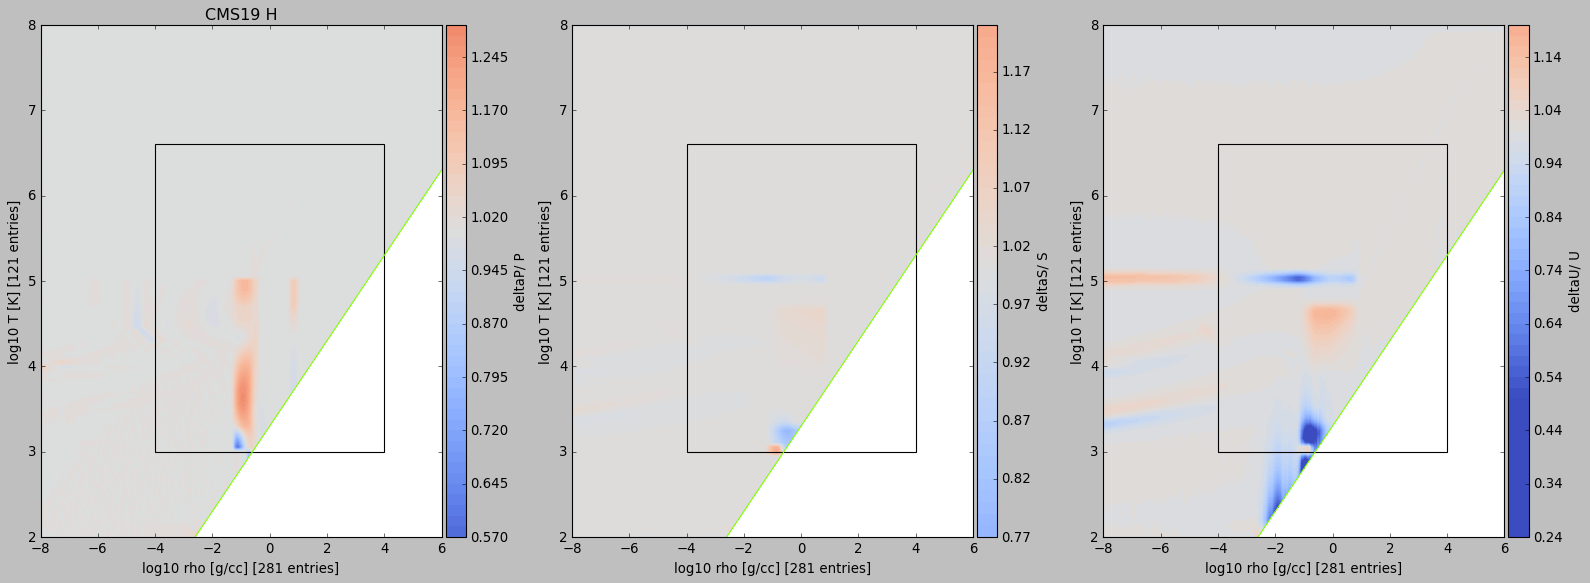

In [83]:
   
fig, axes = plt.subplots(1,3,figsize=(24,8))
    
divider0 = make_axes_locatable(axes[0])
cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cs0 = axes[0].contourf(plot_rho, plot_T, (10**plot_P + deltaP)/10**plot_P, cmap='coolwarm', alpha=1, levels=50, vmin = 0.5, vmax = 1.5)
fig.colorbar(cs0, cax=cax0, orientation='vertical',label='deltaP/ P')
    
divider1 = make_axes_locatable(axes[1])
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cs1 = axes[1].contourf(plot_rho, plot_T, (10**plot_S + deltaS)/10**plot_S, cmap='coolwarm', alpha=1, levels=50, vmin = 0.5, vmax = 1.5)
fig.colorbar(cs1, cax=cax1, orientation='vertical',label='deltaS/ S')

divider2 = make_axes_locatable(axes[2])
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
cs2 = axes[2].contourf(plot_rho, plot_T, (10**plot_U + deltaE)/10**plot_U, cmap='coolwarm', alpha=1, levels=50, vmin = 0.5, vmax = 1.5)
fig.colorbar(cs2, cax=cax2, orientation='vertical',label='deltaU/ U')    
'''
divider3 = make_axes_locatable(axes[3])
cax3 = divider3.append_axes('right', size='5%', pad=0.05)
cs3 = axes[3].contourf(plot_rho, plot_T, np.log10(10**plot_P/10**plot_rho), cmap='magma',alpha=1,levels=np.linspace(9,18,50))
fig.colorbar(cs3, cax=cax3, orientation='vertical',label='log10 (P/rho)')    
    

divider4 = make_axes_locatable(axes[4])
cax4 = divider4.append_axes('right', size='5%', pad=0.05)
cs4 = axes[4].contourf(plot_rho, plot_T, np.log10(10**plot_S * 10**plot_T), cmap='magma',alpha=1,levels=np.linspace(9,18,50))
fig.colorbar(cs4, cax=cax4, orientation='vertical',label='log10 (T*S)')    
'''

log10rho_ = np.linspace(-8,6,100)
for ax in axes:
    p = plt.Rectangle((-4,3),8,3.6,fill=False,color='k')
    ax.add_patch(p)
    ax.set_xlim(-8,6)
    ax.set_ylim(2,8)
    # chabrier+2019 eq 3, limit of validity of EoS
    ax.plot(log10rho_, 3.3 + (1./2.)*log10rho_ + np.log10(table.atomic_number) - (5./3)*np.log10(table.mass_number), ls='-', color='#7FFF00')
    ax.set_xlim(-8.,6)
    ax.set_ylim(2.,8.)
    ax.set_ylabel('log10 T [K] [{0} entries]'.format(nT))
    ax.set_xlabel('log10 rho [g/cc] [{0} entries]'.format(nrho))
        
axes[0].set_title("CMS19 H")
plt.subplots_adjust(hspace=0.1,wspace=0.25)
plt.show()
#plt.savefig("CMS19_H.pdf",bbox_inches='tight')


In [84]:
#deltaE = np.zeros_like(cms19_H.log10Ugrid)

P_adj = 10**cms19_H.log10Pgrid + deltaP
S_adj = 10**cms19_H.log10Sgrid + deltaS
E_adj = 10**cms19_H.log10Ugrid + deltaE
'''
F = 10**cms19_H.log10Ugrid - (10**cms19_H.log10Tgrid * 10**cms19_H.log10Sgrid)
F_adj = F + deltaE - (10**cms19_H.log10Tgrid * deltaS)
'''

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_70431/2952054715.py:4: RuntimeWarning: overflow encountered in power
  S_adj = 10**cms19_H.log10Sgrid + deltaS
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_70431/2952054715.py:5: RuntimeWarning: overflow encountered in power
  E_adj = 10**cms19_H.log10Ugrid + deltaE


'\nF = 10**cms19_H.log10Ugrid - (10**cms19_H.log10Tgrid * 10**cms19_H.log10Sgrid)\nF_adj = F + deltaE - (10**cms19_H.log10Tgrid * deltaS)\n'

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_70431/1223595937.py:60: RuntimeWarning: divide by zero encountered in divide
  dpe = (rho**2/P)*dE_drho_T + (T/P)*dP_dT_rho - 1
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_70431/1223595937.py:60: RuntimeWarning: invalid value encountered in add
  dpe = (rho**2/P)*dE_drho_T + (T/P)*dP_dT_rho - 1


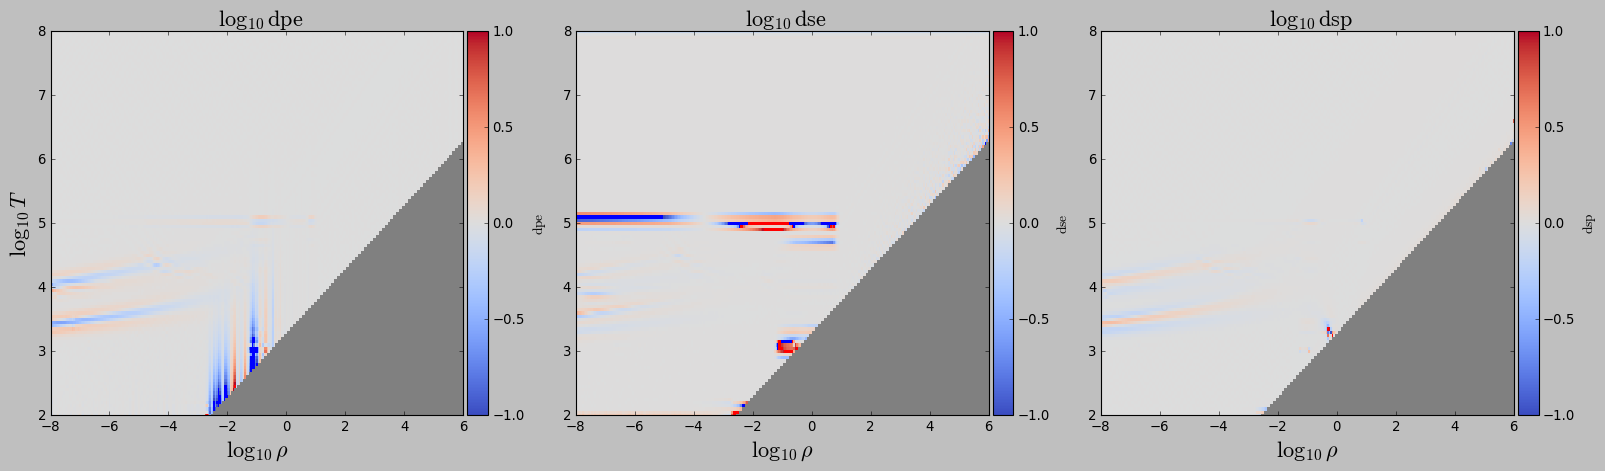

In [85]:
dpe,dse,dsp = consistency_metrics(cms19_H, P_adj, S_adj, E_adj, plot=True,logplot=False, eosname='')

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_70431/4163481034.py:2: RuntimeWarning: divide by zero encountered in log10
  cms19_H_adj.log10Pgrid = np.log10(P_adj)
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_70431/4163481034.py:2: RuntimeWarning: invalid value encountered in log10
  cms19_H_adj.log10Pgrid = np.log10(P_adj)
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_70431/4163481034.py:3: RuntimeWarning: invalid value encountered in log10
  cms19_H_adj.log10Sgrid = np.log10(S_adj)
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_70431/4163481034.py:4: RuntimeWarning: invalid value encountered in log10
  cms19_H_adj.log10Ugrid = np.log10(E_adj)
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_70431/1223595937.py:60: RuntimeWarning: divide by zero encountered in divide
  dpe = (rho**2/P)*dE_drho_T + (T/P)*dP_dT_rho - 1
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_70431/1223595937.py:60: RuntimeWarning: invalid v

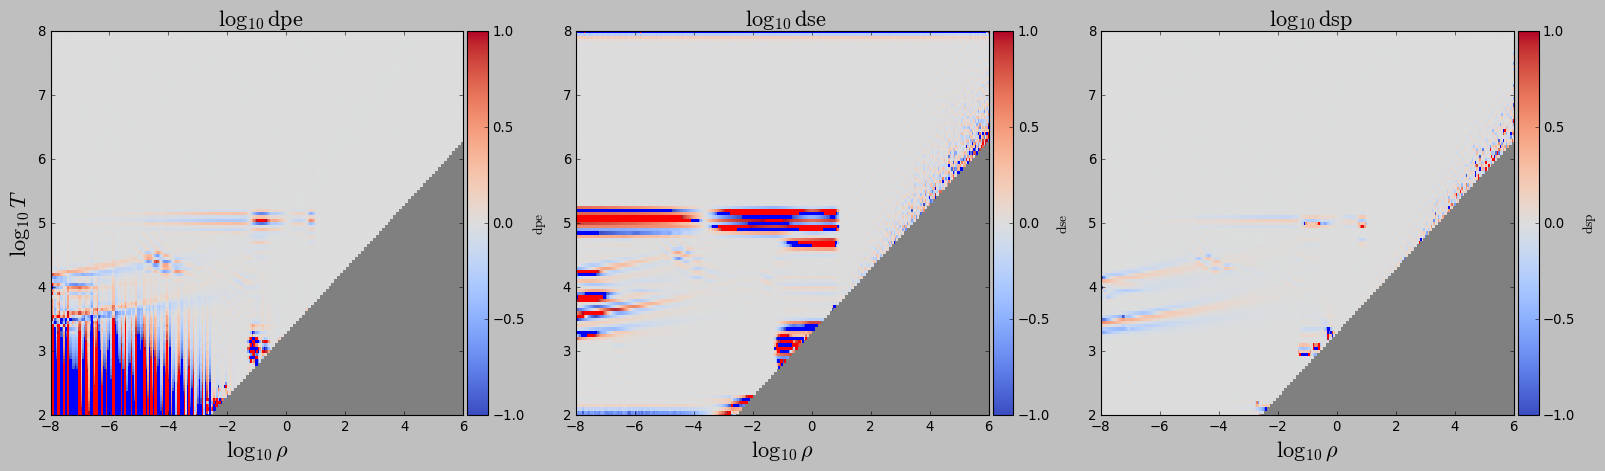

In [91]:
cms19_H_adj = copy.deepcopy(cms19_H)
cms19_H_adj.log10Pgrid = np.log10(P_adj)
cms19_H_adj.log10Sgrid = np.log10(S_adj)
cms19_H_adj.log10Ugrid = np.log10(E_adj)
deltaP2 = calculate_deltaP(cms19_H_adj)
deltaS2 = calculate_deltaS(cms19_H_adj)
deltaE2 = solve_deltaE(cms19_H_adj, deltaS2)

P_adj2 = 10**cms19_H_adj.log10Pgrid + deltaP2
S_adj2 = 10**cms19_H_adj.log10Sgrid + deltaS2
E_adj2 = 10**cms19_H_adj.log10Ugrid + deltaE2
P_adj2[np.isnan(P_adj2)] = np.median(P_adj2[~np.isnan(P_adj2)])
S_adj2[np.isnan(S_adj2)] = np.median(S_adj2[~np.isnan(S_adj2)])
E_adj2[np.isnan(E_adj2)] = np.median(E_adj2[~np.isnan(E_adj2)])

dpe2,dse2,dsp2 = consistency_metrics(cms19_H_adj, P_adj2, S_adj2, E_adj2, plot=True,logplot=False, eosname='')

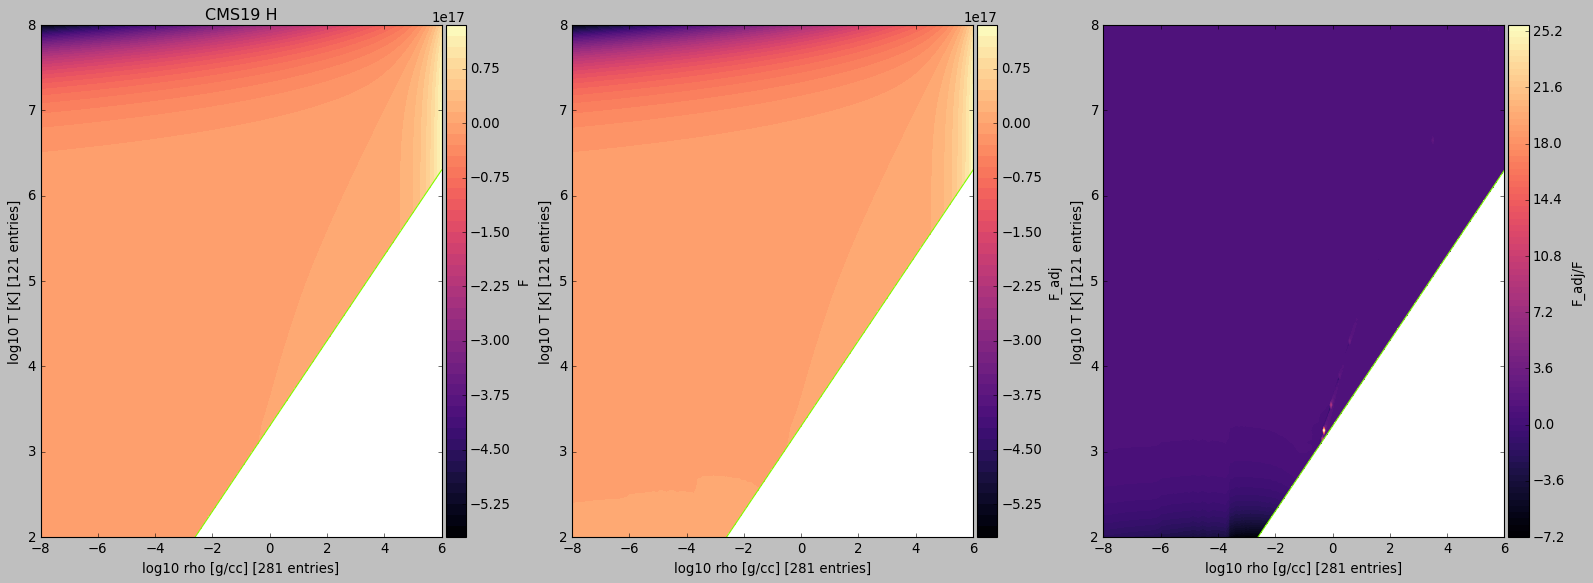

In [59]:
plot_F = np.ma.array(F, mask=~allowedMask, fill_value = np.nan)
plot_F_adj = np.ma.array(F_adj, mask=~allowedMask, fill_value = np.nan)

fig, axes = plt.subplots(1,3,figsize=(24,8))
    
divider0 = make_axes_locatable(axes[0])
cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cs0 = axes[0].contourf(plot_rho, plot_T, plot_F, cmap='magma', alpha=1, levels=50)
fig.colorbar(cs0, cax=cax0, orientation='vertical',label='F')
    
divider1 = make_axes_locatable(axes[1])
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cs1 = axes[1].contourf(plot_rho, plot_T, plot_F_adj, cmap='magma', alpha=1, levels=50)
fig.colorbar(cs1, cax=cax1, orientation='vertical',label='F_adj')

divider2 = make_axes_locatable(axes[2])
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
cs2 = axes[2].contourf(plot_rho, plot_T, plot_F_adj/plot_F, cmap='magma',alpha=1, levels=100)
fig.colorbar(cs2, cax=cax2, orientation='vertical',label='F_adj/F')    
'''
divider3 = make_axes_locatable(axes[3])
cax3 = divider3.append_axes('right', size='5%', pad=0.05)
cs3 = axes[3].contourf(plot_rho, plot_T, np.log10(10**plot_P/10**plot_rho), cmap='magma',alpha=1,levels=np.linspace(9,18,50))
fig.colorbar(cs3, cax=cax3, orientation='vertical',label='log10 (P/rho)')    
    

divider4 = make_axes_locatable(axes[4])
cax4 = divider4.append_axes('right', size='5%', pad=0.05)
cs4 = axes[4].contourf(plot_rho, plot_T, np.log10(10**plot_S * 10**plot_T), cmap='magma',alpha=1,levels=np.linspace(9,18,50))
fig.colorbar(cs4, cax=cax4, orientation='vertical',label='log10 (T*S)')    
'''

log10rho_ = np.linspace(-8,6,100)
for ax in axes:
    p = plt.Rectangle((-4,3),8,3.6,fill=False,color='k')
    #ax.add_patch(p)
    ax.set_xlim(-8,6)
    ax.set_ylim(2,8)
    # chabrier+2019 eq 3, limit of validity of EoS
    ax.plot(log10rho_, 3.3 + (1./2.)*log10rho_ + np.log10(table.atomic_number) - (5./3)*np.log10(table.mass_number), ls='-', color='#7FFF00')
    ax.set_xlim(-8.,6)
    ax.set_ylim(2.,8.)
    ax.set_ylabel('log10 T [K] [{0} entries]'.format(nT))
    ax.set_xlabel('log10 rho [g/cc] [{0} entries]'.format(nrho))
        
axes[0].set_title("CMS19 H")
plt.subplots_adjust(hspace=0.1,wspace=0.25)
plt.show()
#plt.savefig("CMS19_H.pdf",bbox_inches='tight')


In [60]:
def calculate_PSE_from_F(CMStable, F):
    """
    only CMStable.log10rhogrid, CMStable.log10Tgrid are used
    """

    grid_rho = CMStable.log10rhogrid[:,0]
    grid_T = CMStable.log10Tgrid[0]
    
    between_rho = 0.5*(grid_rho[0:-1] + grid_rho[1:])
    between_T = 0.5*(grid_T[0:-1] + grid_T[1:])

    # get rid of single inf value
    F[~np.isfinite(F)] = np.max(F[np.isfinite(F)])

    nrho, nT = np.shape(CMStable.log10Tgrid)

    rho = 10**CMStable.log10rhogrid
    T = 10**CMStable.log10Tgrid

    dF_drho_T_btwn_rho_grid_points = np.zeros((nrho-1, nT))
    
    for i in range(nrho - 1): # number of unique rho values = 281
        dF_drho_T_btwn_rho_grid_points[i] = (F[i+1] - F[i])/(rho[i+1] - rho[i])

    # bounds_error = False, fill_value = None should allow the entries on the edges of the grid to be extrapolated.
    interp_dF_drho_T_given_log10rho_log10T_cubic = interpolate.RegularGridInterpolator(points=(between_rho, grid_T), values=dF_drho_T_btwn_rho_grid_points, bounds_error=False, fill_value=None, method='slinear')

    dF_drho_T = interp_dF_drho_T_given_log10rho_log10T_cubic((CMStable.log10rhogrid, CMStable.log10Tgrid))

    P_from_F = rho**2 * dF_drho_T


    dF_dT_rho_btwn_rho_grid_points = np.zeros((nrho, nT-1))

    for j in range(nT - 1): # number of unique T values = 121
        dF_dT_rho_btwn_rho_grid_points[:,j] = (F[:,j+1] - F[:,j])/(T[:,j+1] - T[:,j])

    # bounds_error = False, fill_value = None should allow the entries on the edges of the grid to be extrapolated.
    interp_dF_dT_rho_given_log10rho_log10T_cubic = interpolate.RegularGridInterpolator(points=(grid_rho, between_T), values=dF_dT_rho_btwn_rho_grid_points, bounds_error=False, fill_value=None, method='slinear')

    dF_dT_rho = interp_dF_dT_rho_given_log10rho_log10T_cubic((table.log10rhogrid, table.log10Tgrid))

    S_from_F = -dF_dT_rho

    E_from_F = F + T*S_from_F
    
    return P_from_F, S_from_F, E_from_F

In [61]:
Pnew, Snew, Enew = calculate_PSE_from_F(cms19_H, F_adj)

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_69734/2197921714.py:14: RuntimeWarning: overflow encountered in power
  cs1 = axes[1].contourf(plot_rho, plot_T, plot_Snew/10**table.log10Sgrid, cmap='coolwarm', alpha=1, levels=50, vmin = 0, vmax = 2)
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_69734/2197921714.py:19: RuntimeWarning: overflow encountered in power
  cs2 = axes[2].contourf(plot_rho, plot_T, plot_Enew/10**table.log10Ugrid, cmap='coolwarm',alpha=1, levels=50, vmin = 0, vmax = 2)


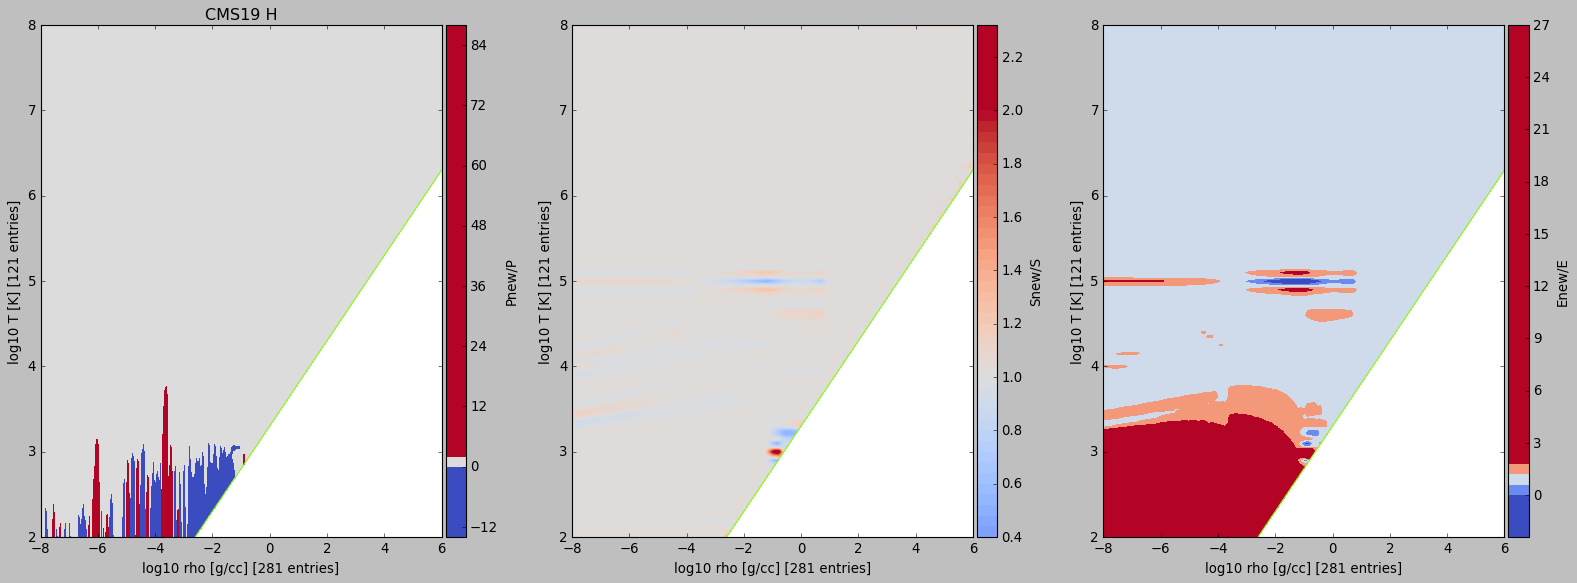

In [62]:
plot_Pnew = np.ma.array(Pnew, mask=~allowedMask, fill_value = np.nan)
plot_Snew = np.ma.array(Snew, mask=~allowedMask, fill_value = np.nan)
plot_Enew = np.ma.array(Enew, mask=~allowedMask, fill_value = np.nan)

fig, axes = plt.subplots(1,3,figsize=(24,8))
    
divider0 = make_axes_locatable(axes[0])
cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cs0 = axes[0].contourf(plot_rho, plot_T, plot_Pnew/10**table.log10Pgrid, cmap='coolwarm', alpha=1, levels=50, vmin = 0, vmax = 2)
fig.colorbar(cs0, cax=cax0, orientation='vertical',label='Pnew/P')
    
divider1 = make_axes_locatable(axes[1])
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cs1 = axes[1].contourf(plot_rho, plot_T, plot_Snew/10**table.log10Sgrid, cmap='coolwarm', alpha=1, levels=50, vmin = 0, vmax = 2)
fig.colorbar(cs1, cax=cax1, orientation='vertical',label='Snew/S')

divider2 = make_axes_locatable(axes[2])
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
cs2 = axes[2].contourf(plot_rho, plot_T, plot_Enew/10**table.log10Ugrid, cmap='coolwarm',alpha=1, levels=50, vmin = 0, vmax = 2)
fig.colorbar(cs2, cax=cax2, orientation='vertical',label='Enew/E')  

'''
divider3 = make_axes_locatable(axes[3])
cax3 = divider3.append_axes('right', size='5%', pad=0.05)
cs3 = axes[3].contourf(plot_rho, plot_T, np.log10(10**plot_P/10**plot_rho), cmap='magma',alpha=1,levels=np.linspace(9,18,50))
fig.colorbar(cs3, cax=cax3, orientation='vertical',label='log10 (P/rho)')    
    

divider4 = make_axes_locatable(axes[4])
cax4 = divider4.append_axes('right', size='5%', pad=0.05)
cs4 = axes[4].contourf(plot_rho, plot_T, np.log10(10**plot_S * 10**plot_T), cmap='magma',alpha=1,levels=np.linspace(9,18,50))
fig.colorbar(cs4, cax=cax4, orientation='vertical',label='log10 (T*S)')    
'''

log10rho_ = np.linspace(-8,6,100)
for ax in axes:
    p = plt.Rectangle((-4,3),8,3.6,fill=False,color='k')
    #ax.add_patch(p)
    ax.set_xlim(-8,6)
    ax.set_ylim(2,8)
    # chabrier+2019 eq 3, limit of validity of EoS
    ax.plot(log10rho_, 3.3 + (1./2.)*log10rho_ + np.log10(table.atomic_number) - (5./3)*np.log10(table.mass_number), ls='-', color='#7FFF00')
    ax.set_xlim(-8.,6)
    ax.set_ylim(2.,8.)
    ax.set_ylabel('log10 T [K] [{0} entries]'.format(nT))
    ax.set_xlabel('log10 rho [g/cc] [{0} entries]'.format(nrho))
        
axes[0].set_title("CMS19 H")
plt.subplots_adjust(hspace=0.1,wspace=0.25)
plt.show()
#plt.savefig("CMS19_H.pdf",bbox_inches='tight')


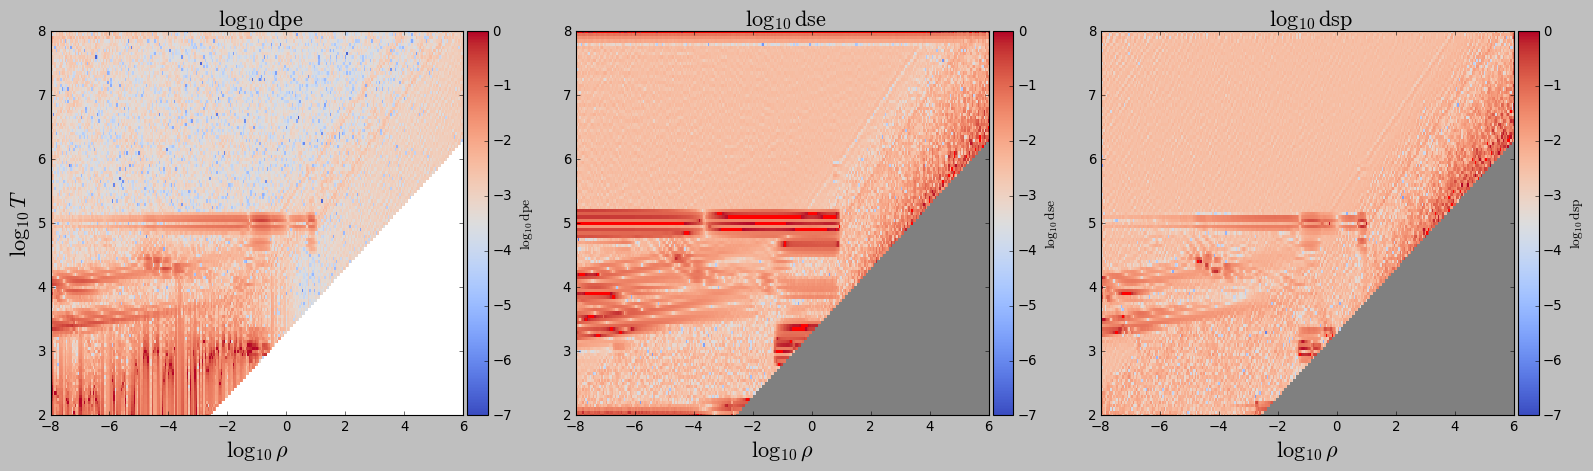

In [64]:
dpe,dse,dsp = consistency_metrics(cms19_H, Pnew,Snew,Enew, plot=True, eosname='')

## Update E and try again

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_67004/2313691189.py:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = copy.copy(mpl.cm.get_cmap("coolwarm"))
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_67004/2313691189.py:77: RuntimeWarning: divide by zero encountered in log10
  cs0 = axes[0].contourf(CMStable.log10rhogrid, CMStable.log10Tgrid, np.log10(np.abs(plot_dpe)), cmap='magma', levels=50)
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_67004/2313691189.py:87: RuntimeWarning: divide by zero encountered in log10
  cs2 = axes[2].contourf(CMStable.log10rhogrid, CMStable.log10Tgrid, np.log10(np.abs(plot_dsp)), cmap='magma', levels=50)


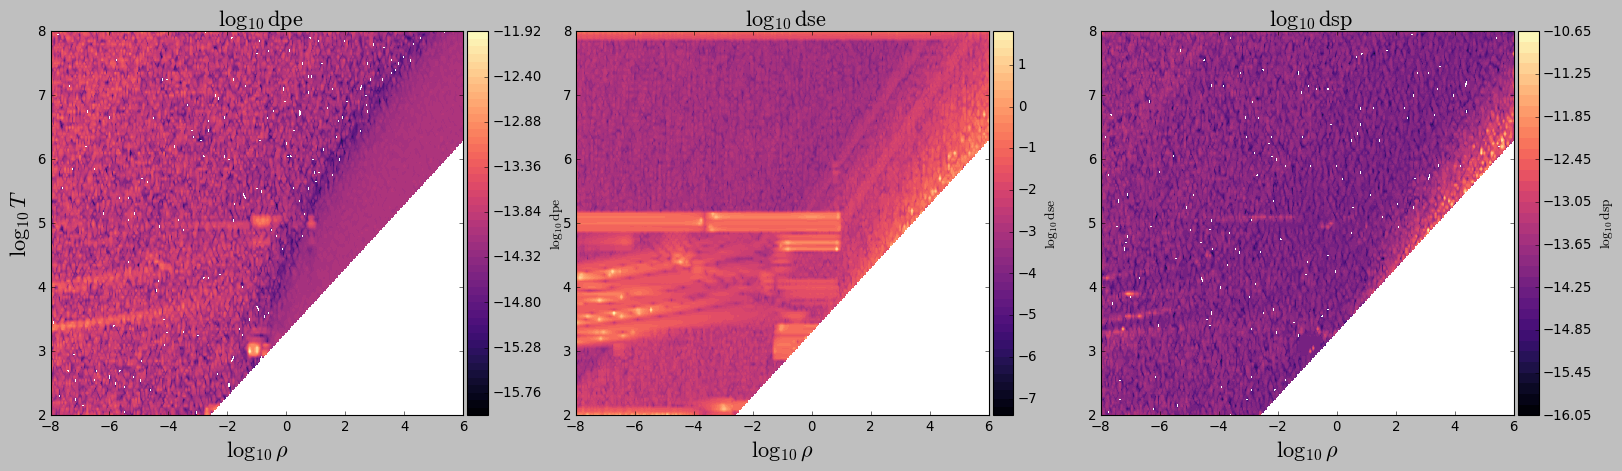

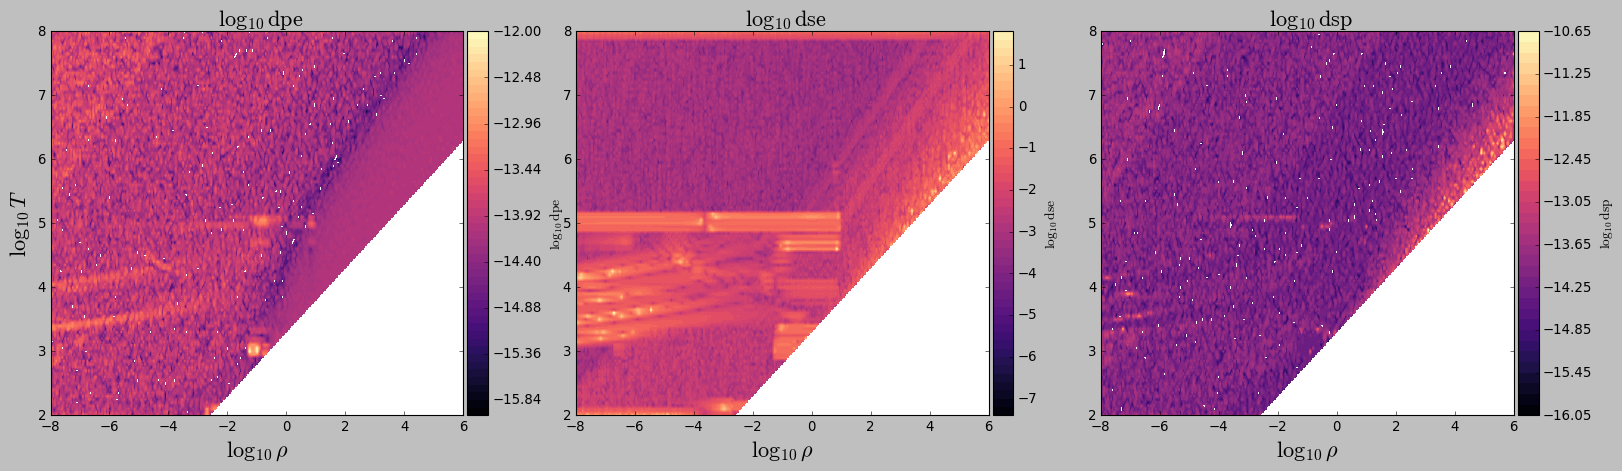

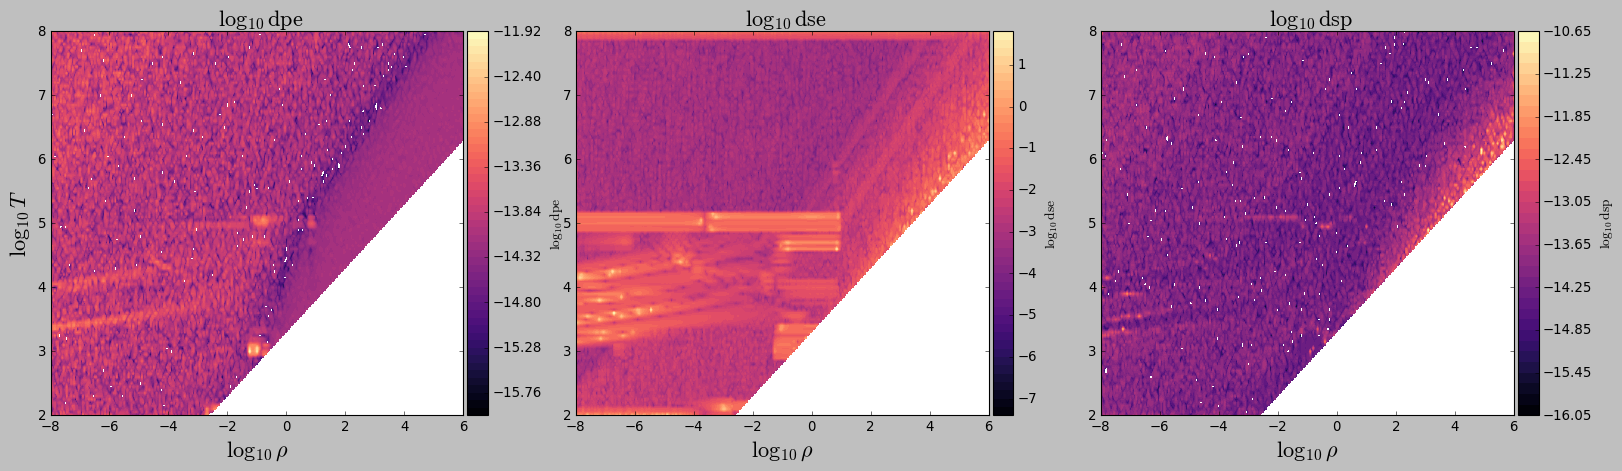

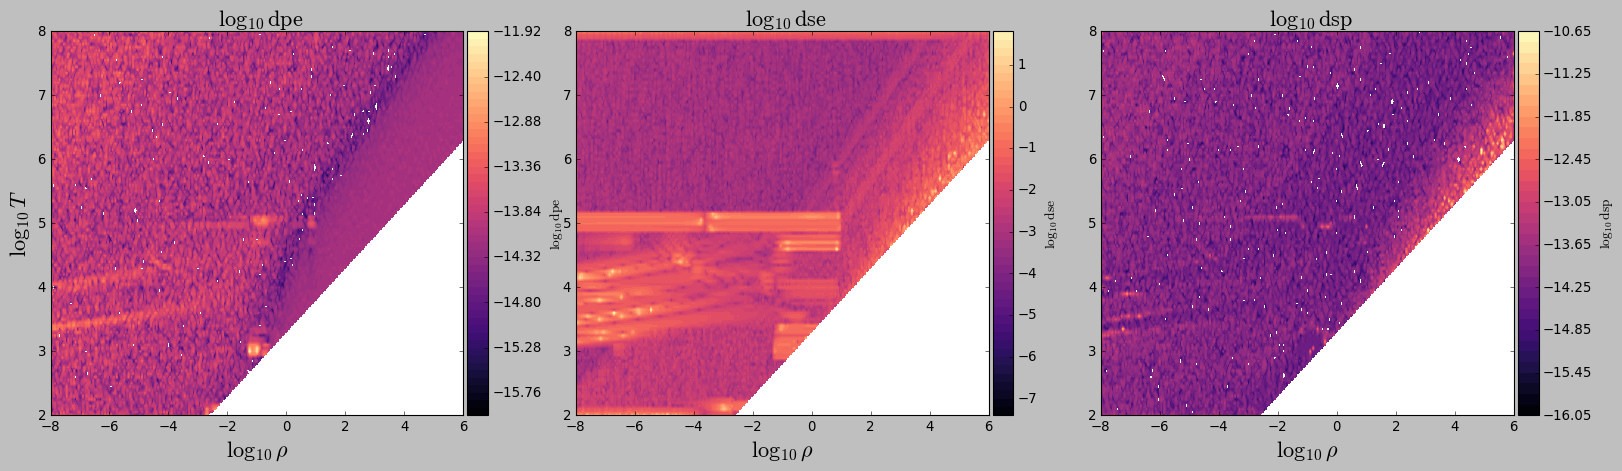

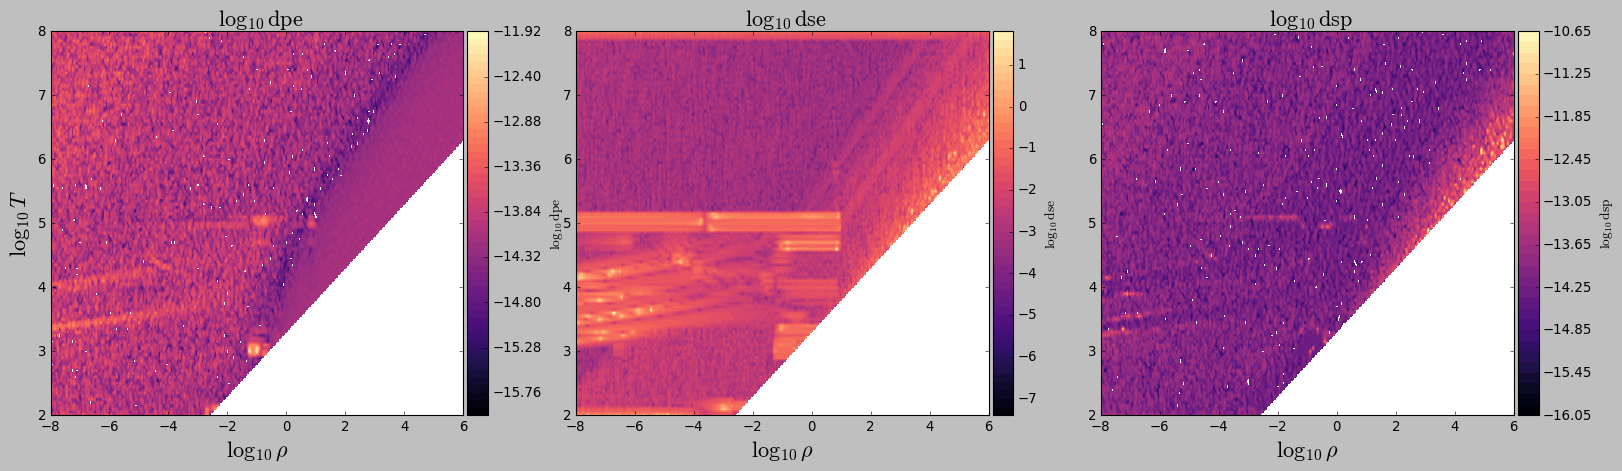

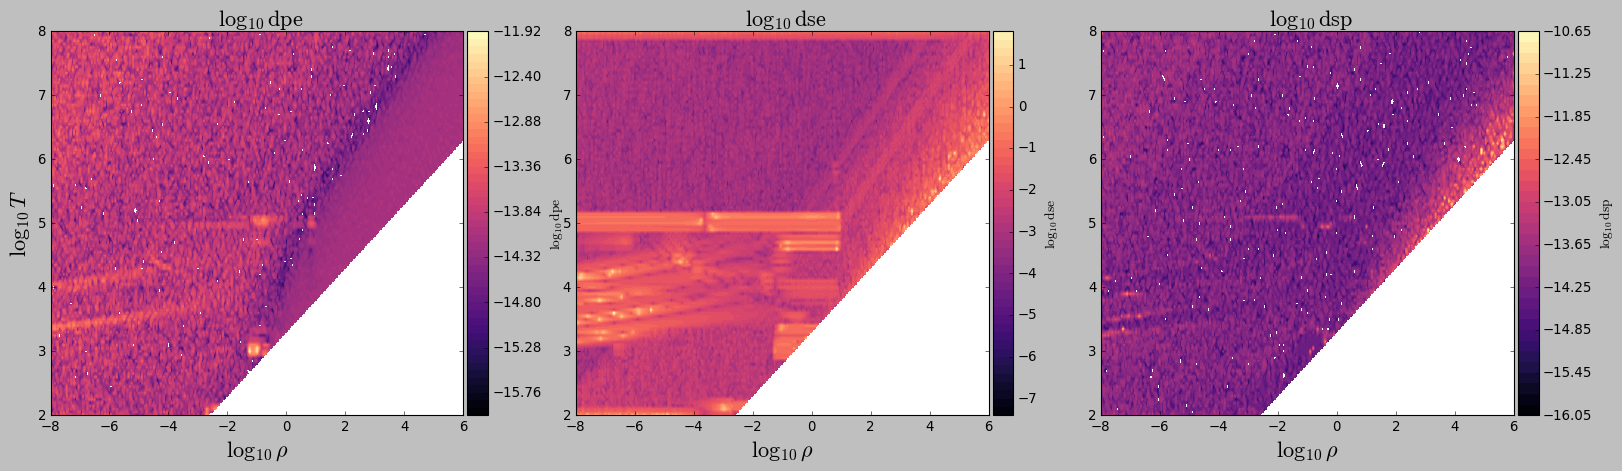

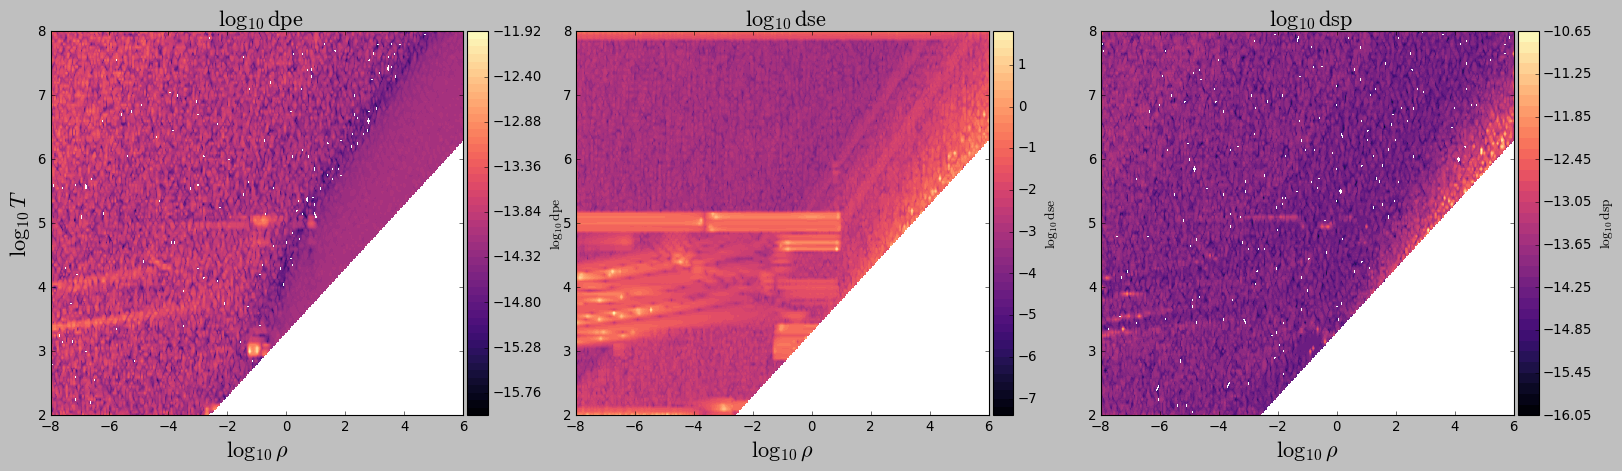

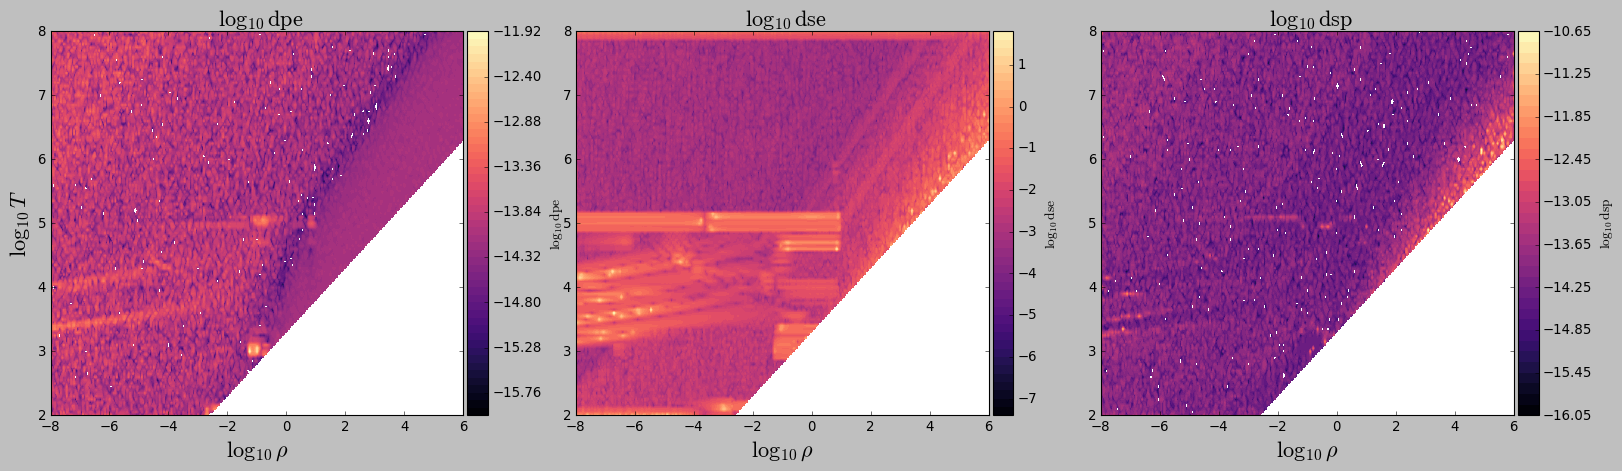

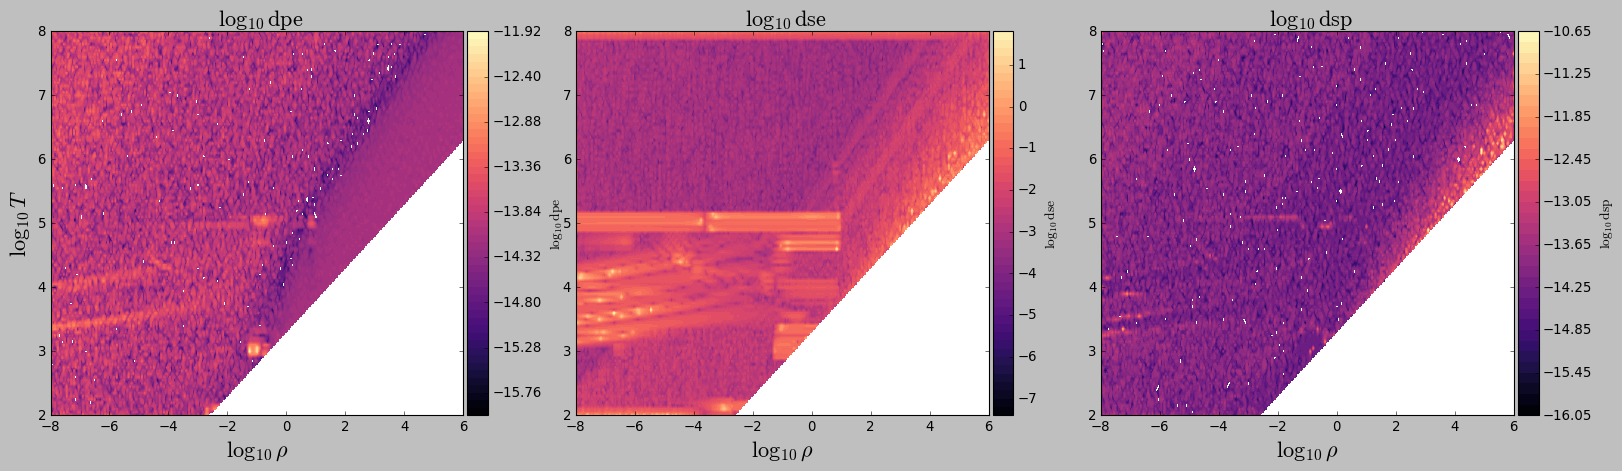

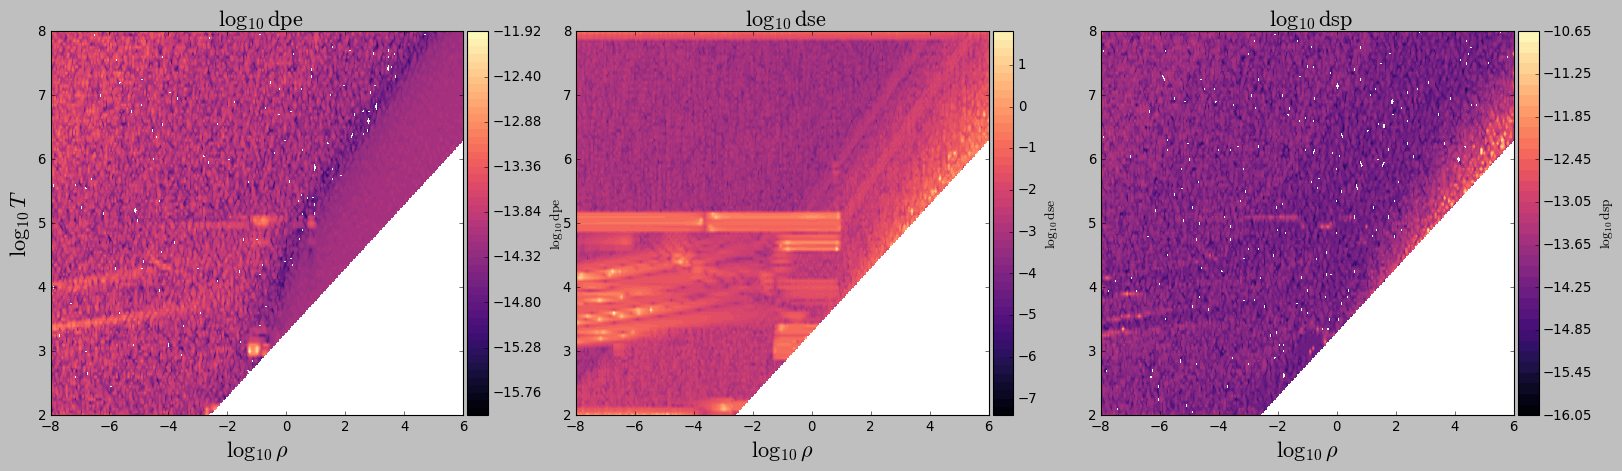

In [19]:
dE_dT_rho_ = copy.deepcopy(dE_dT_rho)
dse_ = copy.deepcopy(dse)
deltaE_ = 0
Enew_ = copy.deepcopy(Enew)
Snew_ = copy.deepcopy(Snew)

for j in range(10):
    k = -1 * dse_ * dE_dT_rho_

    deltaE_ = deltaE_ - 10**cms19_H.log10Tgrid*k
    E_adj_ = Enew_ + deltaE_
    
    F_adj_ = Enew_ - (10**cms19_H.log10Tgrid * Snew_)
    
    Pnew_, Snew_, Enew_ = calculate_PSE_from_F(cms19_H, F_adj_)

    dpe_,dse_,dsp_,dE_dT_rho_ = consistency_metrics(cms19_H, Pnew_,Snew_,Enew_, plot=True, eosname='')
    '''
    if (j-1)%100==0:
        fig, ax = plt.subplots(1,1,figsize=(8,6))
        divider0 = make_axes_locatable(ax)
        cax0 = divider0.append_axes('right', size='5%', pad=0.05)
        cs0 = ax.contourf(plot_rho, plot_T, dse_new/dse_, cmap='coolwarm',alpha=1, levels=50, vmin = 0, vmax = 2)
        fig.colorbar(cs0, cax=cax0, orientation='vertical',label=r'new dse/old dse')

        plt.show()
    dse_ = dse_new
    '''
    #print(np.median(dse_))
    #print(np.max(dse_))
    #print("")

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_67004/2313691189.py:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = copy.copy(mpl.cm.get_cmap("coolwarm"))
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_67004/2313691189.py:77: RuntimeWarning: divide by zero encountered in log10
  cs0 = axes[0].contourf(CMStable.log10rhogrid, CMStable.log10Tgrid, np.log10(np.abs(plot_dpe)), cmap='magma', levels=50)
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_67004/2313691189.py:87: RuntimeWarning: divide by zero encountered in log10
  cs2 = axes[2].contourf(CMStable.log10rhogrid, CMStable.log10Tgrid, np.log10(np.abs(plot_dsp)), cmap='magma', levels=50)


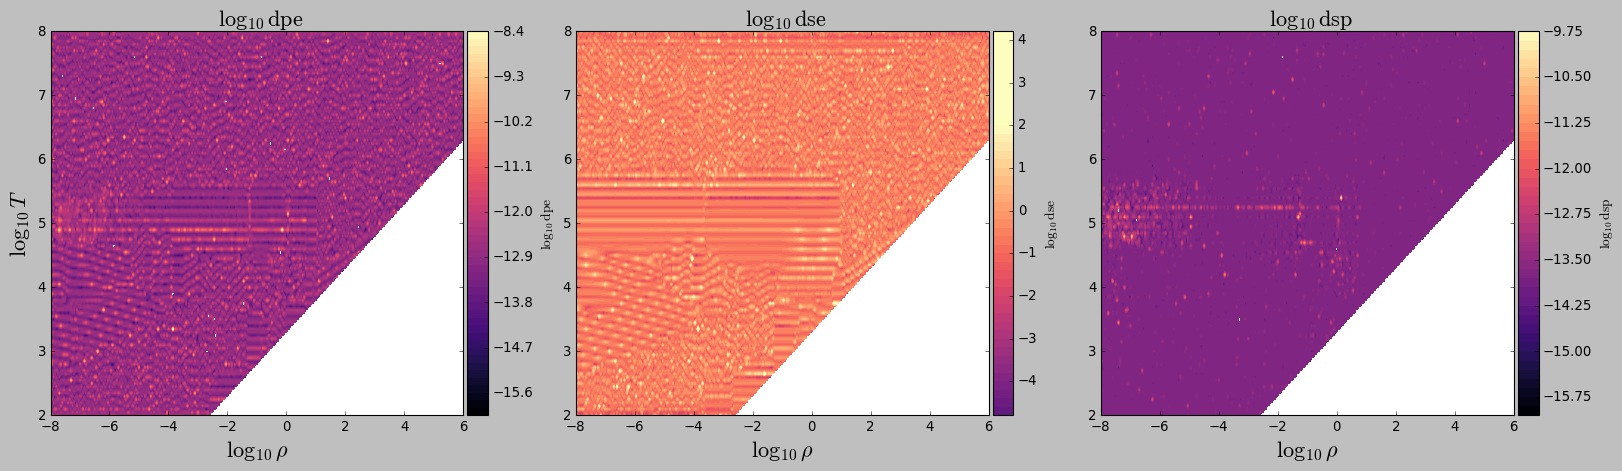

ValueError: too many values to unpack (expected 3)

In [18]:
dpe_,dse_,dsp_ = consistency_metrics(cms19_H, Pnew_,Snew_,Enew_, plot=True, eosname='')

In [ ]:
def calculate_F_analytically(CMStable):
    # method 1 of calculating F: F = -p/rho
    F1 = -1 * 10**CMStable.log10Pgrid/10**CMStable.log10rhogrid
    
    # method 2 of calculating F: F = E - TS
    F2 = 10**CMStable.log10Ugrid - (10**CMStable.log10Tgrid)*(10**CMStable.log10Sgrid)

    return F1, F2

In [ ]:
F1, F2 = calculate_F_analytically(cms19_H)

In [ ]:
plot_F1 = np.log10(np.abs(F1))
plot_F2 = np.log10(np.abs(F2))
'''
print(np.min(plot_F1))
print(np.max(plot_F1))

print(np.min(plot_F2[~np.isnan(plot_F2)]))
print(np.max(plot_F2[~np.isnan(plot_F2)]))
'''

In [ ]:
Flevels = np.linspace(9.,20.,50)

nT = len(table.independent_arr_1)
nrho = len(table.independent_arr_2)
 
# masked arrays work a bit backwards--if mask == True, then that value is masked, i.e. set to np.nan
allowedMask = ~meos.boundary_mask_rhoT(table) & ~meos.boundary_mask_PT(table)
    
plot_rho = np.ma.array(table.log10rhogrid, mask=~allowedMask, fill_value = np.nan)
plot_T = np.ma.array(table.log10Tgrid, mask=~allowedMask, fill_value = np.nan)
plot_S = np.ma.array(table.log10Sgrid, mask=~allowedMask, fill_value = np.nan)
plot_P = np.ma.array(table.log10Pgrid, mask=~allowedMask, fill_value = np.nan)
plot_U = np.ma.array(table.log10Ugrid, mask=~allowedMask, fill_value = np.nan)

plot_F1 = np.ma.array(plot_F1, mask=~allowedMask, fill_value = np.nan)
plot_F2 = np.ma.array(plot_F2, mask=~allowedMask, fill_value = np.nan)

fig, axes = plt.subplots(1,3,figsize=(24,6))
    
divider0 = make_axes_locatable(axes[0])
cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cs0 = axes[0].contourf(plot_rho, plot_T, plot_F1, cmap='magma',alpha=1, levels=Flevels)
fig.colorbar(cs0, cax=cax0, orientation='vertical',label='log10(abs(F1))')
    
divider1 = make_axes_locatable(axes[1])
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cs1 = axes[1].contourf(plot_rho, plot_T, plot_F2, cmap='magma',alpha=1, levels=Flevels)
fig.colorbar(cs1, cax=cax1, orientation='vertical',label='log10(abs(F2))')

divider2 = make_axes_locatable(axes[2])
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
cs2 = axes[2].contourf(plot_rho, plot_T, np.abs(10**plot_F1 - 10**plot_F2)/10**plot_F1, cmap='magma',alpha=1)
#cs2 = axes[2].contourf(plot_rho, plot_T, np.log10(10**plot_F1 - 10**plot_F2)/plot_F1, cmap='plasma',alpha=1)
fig.colorbar(cs2, cax=cax2, orientation='vertical',label='(F1-F2)/F1')    
 
    
log10rho_ = np.linspace(-8,6,100)
for ax in axes:
    #p = plt.Rectangle((-4,3),8,3.6,fill=False,color='k')
    #ax.add_patch(p)
    ax.set_xlim(-8,6)
    ax.set_ylim(2,8)
    # chabrier+2019 eq 3, limit of validity of EoS
    ax.plot(log10rho_, 3.3 + (1./2.)*log10rho_ + np.log10(table.atomic_number) - (5./3)*np.log10(table.mass_number), ls='-', color='#7FFF00')
    ax.set_xlim(-8.,6)
    ax.set_ylim(2.,8.)
    
    ax.set_ylabel('log10 T [K] [{0} entries]'.format(nT))
    ax.set_xlabel('log10 rho [g/cc] [{0} entries]'.format(nrho))
    #ax.set_aspect('equal')
        
axes[0].set_title("CMS19 H")
plt.subplots_adjust(hspace=0.1,wspace=0.25)
plt.show()
#plt.savefig("CMS19_H.pdf",bbox_inches='tight')


In [ ]:
def decomposeE(Egrid):
    """
    use least squares to find an (approximate) solution to the overdetermined system
    E(rho, T) = kRho(rho) + kT(T)
    where kRho is a function of rho only
          kT   is a function of T only
    """

    nRho, nT = np.shape(Egrid)

    RHS_vec = np.ravel(Egrid) # if original matrix is [[E00, E01,..., E0j],[E10, E11,..., E1j],...,[Ei0, Ei1,..., Eij]]
                                 # then raveled version is [E00,...E0j,E10,...E1j,...Ei0,..,.Eij]

    #print(Egrid[0:2])
    #print(RHS_vec[0:123])
    coeff_matrix = np.zeros((nRho*nT, nRho + nT))
    for i in range(nRho):
        coeff_matrix[i*nT:(i+1)*nT, i] = 1
        for j in range(nT):
            coeff_matrix[i*nT + j, nRho + j] = 1
    #print(coeff_matrix)
    
    LHS_vec = scipy_lstsq(coeff_matrix, RHS_vec)[0]
    #print(LHS_vec)
    
    kRho = LHS_vec[0:nRho]
    kT = LHS_vec[nRho:]

    #print(np.shape(kRho))

    kRho_mat = np.zeros_like(Egrid)
    kT_mat = np.zeros_like(Egrid)
    
    #print(np.shape(kRho_mat))
    for i in range(nT):
        kRho_mat[:,i] = kRho
    kT_mat = np.zeros_like(Egrid)
    for j in range(nRho):
        kT_mat[j] = kT
     
    return kRho_mat, kT_mat

In [ ]:
'''
kRho_mat, kT_mat = decomposeE(table.log10Ugrid)
print(kRho_mat)
print(kT_mat)
kRho_mat = kRho_mat + 1.53327367e10
kT_mat = kT_mat - 1.53327367e10
print(kRho_mat + kT_mat)
'''

In [ ]:
print(np.shape(cms19_H.log10Ugrid))

In [ ]:
expE = 10**cms19_H.log10Ugrid
print(np.max(expE[np.isfinite(expE)]))
expE[~np.isfinite(expE)] = np.max(expE[np.isfinite(expE)])
print(expE[~np.isfinite(expE)])

In [ ]:
#C = 0.9999999999 * expE
C = 0
kRho_mat, kT_mat = decomposeE(expE - C)
#kRho_mat = kRho_mat + 1.01072344e+26 
#kT_mat = kT_mat - 1.01072344e+26 
#print(expE[0])
#print(kRho_mat[0])
#print(kT_mat[0])
kSum_mat = kRho_mat + kT_mat
dE = kSum_mat - expE - C

In [ ]:
print(np.log10(np.median(expE)))
print(-np.log10(-np.median(kSum_mat)))
print(-np.log10(-np.median(dE)))

In [ ]:
Ulevels = np.linspace(6.5,20, 50)

plot_expE = np.ma.array(expE, mask=~allowedMask, fill_value = np.nan)
plot_kSum_mat = np.ma.array(kSum_mat, mask=~allowedMask, fill_value = np.nan)
plot_dE = np.ma.array(dE, mask=~allowedMask, fill_value = np.nan)

fig, axes = plt.subplots(1,5,figsize=(40,6))
    
divider0 = make_axes_locatable(axes[0])
cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cs0 = axes[0].contourf(plot_rho, plot_T, plot_U, cmap='magma',alpha=1, levels=Ulevels)
fig.colorbar(cs0, cax=cax0, orientation='vertical',label='log10E')
    
divider1 = make_axes_locatable(axes[1])
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cs1 = axes[1].contourf(plot_rho, plot_T, np.log10(np.abs(plot_kSum_mat)), cmap='magma',alpha=1, levels=50)
fig.colorbar(cs1, cax=cax1, orientation='vertical',label='log10(K1(T) + K2(rho) - dE)')

divider2 = make_axes_locatable(axes[2])
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
cs2 = axes[2].contourf(plot_rho, plot_T, np.log10(np.abs(plot_dE)), cmap='magma',alpha=1, levels=50)
fig.colorbar(cs2, cax=cax2, orientation='vertical',label='log10(abs(dE))')    

divider3 = make_axes_locatable(axes[3])
cax3 = divider3.append_axes('right', size='5%', pad=0.05)
cs3 = axes[3].contourf(plot_rho, plot_T, np.log10(np.abs(plot_dE/plot_expE)), cmap='magma',alpha=1,levels=50)
fig.colorbar(cs3, cax=cax3, orientation='vertical',label='log10(abs(dE/E))')    

divider4 = make_axes_locatable(axes[4])
cax4 = divider4.append_axes('right', size='5%', pad=0.05)
cs4 = axes[4].contourf(plot_rho, plot_T, plot_kSum_mat - plot_expE - plot_dE, cmap='magma',alpha=1)
fig.colorbar(cs4, cax=cax4, orientation='vertical',label='K1(T) + K2(rho) - E - dE')    

    
log10rho_ = np.linspace(-8,6,100)
for ax in axes:
    #p = plt.Rectangle((-4,3),8,3.6,fill=False,color='k')
    #ax.add_patch(p)
    ax.set_xlim(-8,6)
    ax.set_ylim(2,8)
    # chabrier+2019 eq 3, limit of validity of EoS
    ax.plot(log10rho_, 3.3 + (1./2.)*log10rho_ + np.log10(table.atomic_number) - (5./3)*np.log10(table.mass_number), ls='-', color='#7FFF00')
    ax.set_xlim(-8.,6)
    ax.set_ylim(2.,8.)
    
    ax.set_ylabel('log10 T [K] [{0} entries]'.format(nT))
    ax.set_xlabel('log10 rho [g/cc] [{0} entries]'.format(nrho))
    #ax.set_aspect('equal')
        
axes[0].set_title("CMS19 H")
plt.subplots_adjust(hspace=0.1,wspace=0.25)
plt.show()
#plt.savefig("CMS19_H.pdf",bbox_inches='tight')


In [ ]:
Ulevels = np.linspace(6.5,20, 50)

fig, axes = plt.subplots(1,3,figsize=(24,6))
    
divider0 = make_axes_locatable(axes[0])
cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cs0 = axes[0].contourf(plot_rho, plot_T, np.log10(np.abs(plot_dE/plot_expE)), cmap='magma',alpha=1, levels=50)
fig.colorbar(cs0, cax=cax0, orientation='vertical',label='log10(abs(dE/E))')
    
divider1 = make_axes_locatable(axes[1])
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cs1 = axes[1].contourf(plot_rho, plot_T, np.log10(np.abs(plot_dE/(10**plot_S * 10**plot_T))), cmap='magma',alpha=1, levels=50)
fig.colorbar(cs1, cax=cax1, orientation='vertical',label='log10(abs(dE/TS))')

divider2 = make_axes_locatable(axes[2])
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
cs2 = axes[2].contourf(plot_rho, plot_T, np.log10(np.abs(plot_dE/(10**plot_P/10**plot_rho))), cmap='magma',alpha=1, levels=50)
fig.colorbar(cs2, cax=cax2, orientation='vertical',label='log10(abs(dE/(P/rho)))')    
'''
divider3 = make_axes_locatable(axes[3])
cax3 = divider3.append_axes('right', size='5%', pad=0.05)
cs3 = axes[3].contourf(plot_rho, plot_T, np.log10(np.abs(plot_dE/plot_expE)), cmap='magma',alpha=1,levels=50)
fig.colorbar(cs3, cax=cax3, orientation='vertical',label='log10(abs(dE/E))')    

divider4 = make_axes_locatable(axes[4])
cax4 = divider4.append_axes('right', size='5%', pad=0.05)
cs4 = axes[4].contourf(plot_rho, plot_T, plot_kSum_mat - plot_expE - plot_dE, cmap='magma',alpha=1)
fig.colorbar(cs4, cax=cax4, orientation='vertical',label='K1(T) + K2(rho) - E - dE')    
'''
    
log10rho_ = np.linspace(-8,6,100)
for ax in axes:
    #p = plt.Rectangle((-4,3),8,3.6,fill=False,color='k')
    #ax.add_patch(p)
    ax.set_xlim(-8,6)
    ax.set_ylim(2,8)
    # chabrier+2019 eq 3, limit of validity of EoS
    ax.plot(log10rho_, 3.3 + (1./2.)*log10rho_ + np.log10(table.atomic_number) - (5./3)*np.log10(table.mass_number), ls='-', color='#7FFF00')
    ax.set_xlim(-8.,6)
    ax.set_ylim(2.,8.)
    
    ax.set_ylabel('log10 T [K] [{0} entries]'.format(nT))
    ax.set_xlabel('log10 rho [g/cc] [{0} entries]'.format(nrho))
    #ax.set_aspect('equal')
        
axes[0].set_title("CMS19 H")
plt.subplots_adjust(hspace=0.1,wspace=0.25)
plt.show()
#plt.savefig("CMS19_H.pdf",bbox_inches='tight')
